# Importanto as principais bibliotecas

In [83]:
from google.colab import drive
from google.colab import files
import os
import pandas as pd
import requests
import json
import random
import scipy.io
import zipfile
from scipy.io import loadmat

# Defininindo o caminho raiz do Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Montando o drive e definindo o caminho principal para a pasta em que está a base de dados.

In [85]:
# Definindo o caminho padrão para a pasta que contém o projeto e a base de dados
# Caso dê erro neste ponto, por gentileza, me informar, para que
# eu possa compartilhar corretamente a pasta.

BASE_DIR = '/content/drive/MyDrive/ITA - Pessoal/8º Semestre/ET-287/Projetos/Projeto 5'
os.chdir(BASE_DIR)
os.listdir(BASE_DIR)

['archive.zip',
 'jena_climate_2009_2016.csv',
 'temperature.csv',
 'temperatura.csv',
 'Project5_Ulisses_Lopes_da_Silva.ipynb',
 'checkpoint_modelo1.weights.h5',
 'history_lstm_loss.npy',
 'history_lstm_val_loss.npy',
 'history_lstm_mae.npy',
 'history_lstm_val_mae.npy',
 'checkpoint_modelo2.weights.h5',
 'history_lstm_2_loss.npy',
 'history_lstm_2_val_loss.npy',
 'history_lstm_2_mae.npy',
 'history_lstm_2_val_mae.npy',
 'history_lstm_3_loss.npy',
 'history_lstm_3_val_loss.npy',
 'history_lstm_3_mae.npy',
 'history_lstm_3_val_mae.npy',
 'temperatura2015.csv',
 'checkpoint_modelo2015.weights.h5',
 'history_lstm2015_loss.npy',
 'history_lstm2015_val_loss.npy',
 'history_lstm2015_mae.npy',
 'history_lstm2015_val_mae.npy']

# Extraindo os arquivos da base de dados.

In [86]:
# APENAS DESCOMENTE ESTA LINHA E RODE ESTA CÉLULA SE OS ARQUIVOS AINDA NÃO ESTIVEREM DESCOMPACTADOS!
# APÓS A DESCOMPACTAÇÃO, COMENTAR AS LINHAS ABAIXO

# Descompactar os arquivos
# O arquivo é muito grande. Pode demorar um tempo considerável
#zip_object = zipfile.ZipFile(BASE_DIR + '/archive.zip', mode = 'r')
#zip_object.extractall(BASE_DIR)
#zip_object.close()

In [87]:
os.listdir(BASE_DIR)

['archive.zip',
 'jena_climate_2009_2016.csv',
 'temperature.csv',
 'temperatura.csv',
 'Project5_Ulisses_Lopes_da_Silva.ipynb',
 'checkpoint_modelo1.weights.h5',
 'history_lstm_loss.npy',
 'history_lstm_val_loss.npy',
 'history_lstm_mae.npy',
 'history_lstm_val_mae.npy',
 'checkpoint_modelo2.weights.h5',
 'history_lstm_2_loss.npy',
 'history_lstm_2_val_loss.npy',
 'history_lstm_2_mae.npy',
 'history_lstm_2_val_mae.npy',
 'history_lstm_3_loss.npy',
 'history_lstm_3_val_loss.npy',
 'history_lstm_3_mae.npy',
 'history_lstm_3_val_mae.npy',
 'temperatura2015.csv',
 'checkpoint_modelo2015.weights.h5',
 'history_lstm2015_loss.npy',
 'history_lstm2015_val_loss.npy',
 'history_lstm2015_mae.npy',
 'history_lstm2015_val_mae.npy']

# **ITEM 2** - Faça a indexação dos dados temporalmente e considere somente a variável ```temperatura```

In [88]:
# Manipulações iniciais dos dados
# Caminho padrão do arquivo
path_file = os.path.join(BASE_DIR, 'jena_climate_2009_2016.csv')

# Ler o arquivo e printar as primeiras linhas
df = pd.read_csv(path_file)
df.head()


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [89]:
# Formato da tabela
print(df.shape, '\n')

df_columns = list(df.columns)
print(df_columns, '\n')

df.describe()

(420551, 15) 

['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'] 



,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


## Verificando integridade dos dados

In [90]:
# Verificar se há dados faltantes
print(df.isnull().sum(), '\n\n')

# Verificando se há dados não numéricos (strings)
print(df.dtypes, '\n\n')

# infos gerais
df.info()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64 


Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  obj

                     temperatura_C
Date Time                         
2009-01-01 00:10:00          -8.02
2009-01-01 00:20:00          -8.41
2009-01-01 00:30:00          -8.51
2009-01-01 00:40:00          -8.31
2009-01-01 00:50:00          -8.27
2009-01-01 01:00:00          -8.05
2009-01-01 01:10:00          -7.62
2009-01-01 01:20:00          -7.62
2009-01-01 01:30:00          -7.91
2009-01-01 01:40:00          -8.43
2009-01-01 01:50:00          -8.76
2009-01-01 02:00:00          -8.88
2009-01-01 02:10:00          -8.85
2009-01-01 02:20:00          -8.83
2009-01-01 02:30:00          -8.66
2009-01-01 02:40:00          -8.66
2009-01-01 02:50:00          -8.70
2009-01-01 03:00:00          -8.81
2009-01-01 03:10:00          -8.84
2009-01-01 03:20:00          -8.94


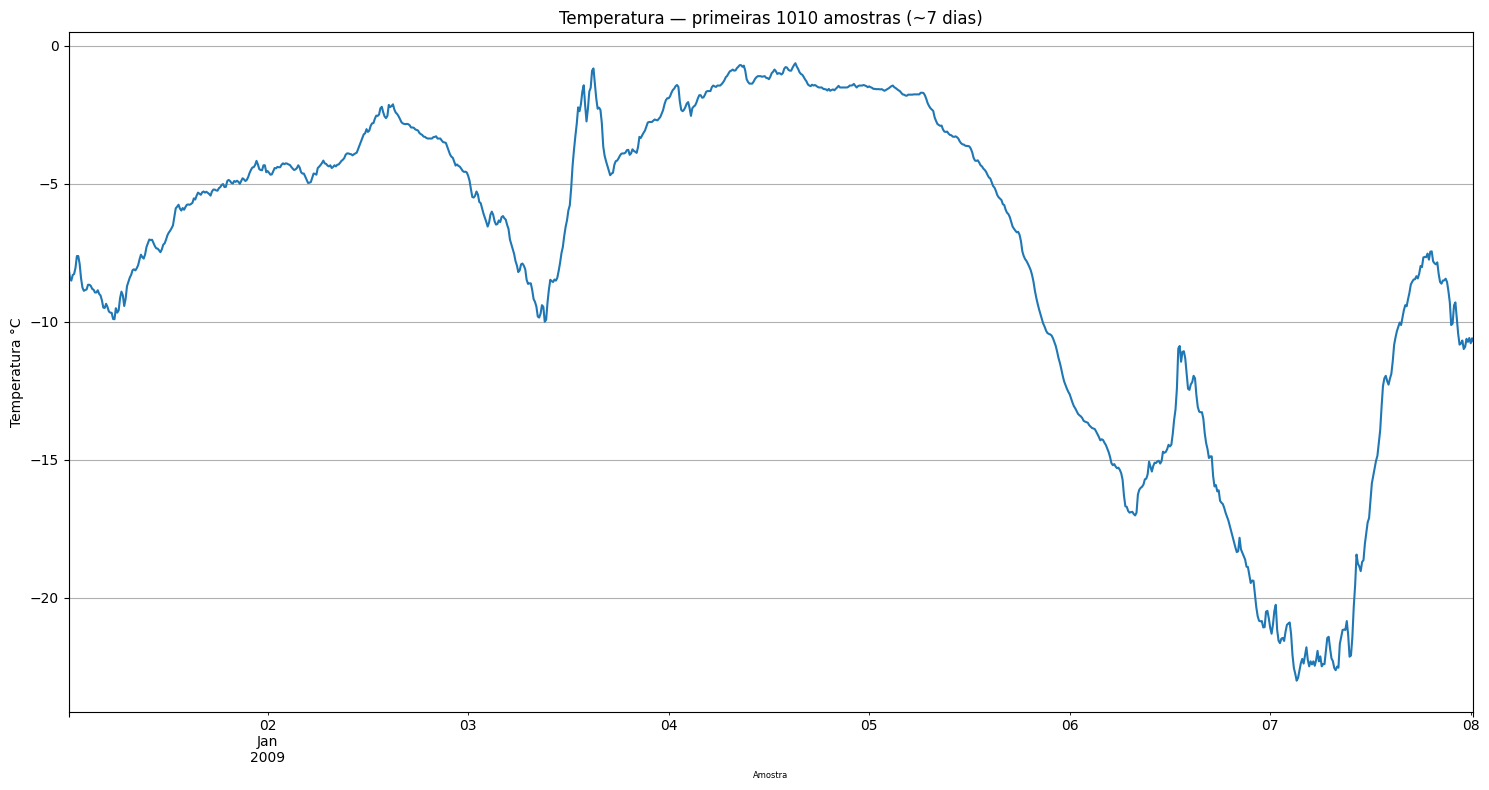

Arquivo gerado:  /content/drive/MyDrive/ITA - Pessoal/8º Semestre/ET-287/Projetos/Projeto 5/temperatura.csv


In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import sqrt, pi, exp
import numpy as np

# Ordenar temporalmente (pela data)
df["Date Time"] = pd.to_datetime(df["Date Time"], dayfirst=True)

# Manter apenas a temperatura
df_temp = df[["T (degC)"]].astype(float).rename(columns={"T (degC)":"temperatura_C"})
df_temp.index = df["Date Time"]
df_temp = df_temp.sort_index()

print(df_temp.head(20))

# Salvando o novo arquivo
temp_csv = os.path.join(BASE_DIR, 'temperatura.csv')
df_temp.to_csv(temp_csv, index=True)

# Rápida visualização de um período aproximado de 7 dias
plt.figure(figsize=(15,8))

# Como há 6 registros por hora, 6*24*7 = 1008
subset = df_temp.iloc[:1010]
subset.plot(legend=False, ax=plt.gca())

plt.title("Temperatura — primeiras 1010 amostras (~7 dias)")
plt.xlabel("Amostra", fontsize=6)
plt.ylabel("Temperatura °C")
plt.tight_layout()
plt.grid()
plt.show()

print("Arquivo gerado: ", temp_csv)

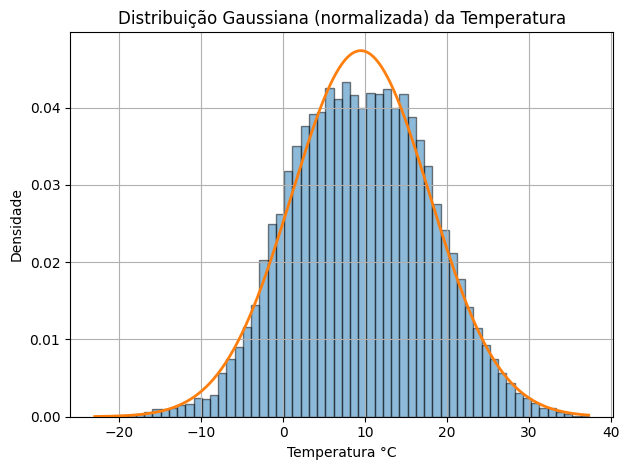

média (μ): 9.450 °C | Desvio padrão (σ): 8.423 °C


In [92]:
# Distribuição Gaussiana da temperatura de todas as amostras
mu = df_temp["temperatura_C"].mean()
sigma = df_temp["temperatura_C"].std(ddof=1)

# plotando a distribuição
plt.figure()
counts, bins, patches = plt.hist(df_temp, bins = 60, density=True, alpha=0.5, edgecolor='black')

xs = np.linspace(bins.min(), bins.max(), 500)
pdf = (1/(sigma * sqrt(2 * pi))) * np.exp(-0.5 * ((xs - mu)/sigma)**2)
plt.plot(xs, pdf, linewidth=2)

plt.title("Distribuição Gaussiana (normalizada) da Temperatura")
plt.xlabel("Temperatura °C")
plt.ylabel("Densidade")
plt.tight_layout()
plt.grid()
plt.show()

print(f"média (μ): {mu:.3f} °C | Desvio padrão (σ): {sigma:.3f} °C")

Como se verifica, as medições estão em torno de 10°C, aproximadamente.

# **ITEM 3** - Particione a base de dados: 80% para treinar, 15% para validar e 5% para testar. Mantenha a sequência temporal (configure `shuffle=0`)


In [93]:
# Verificando a quantidade de amostras
n = len(df_temp["temperatura_C"])

n_train = int(n * 0.80)
n_val = int( n * 0.15)
n_test = n - n_train - n_val

print(f" Amostras de TREINO: {n_train} amostras")
print(f" Amostras de VALIDAÇÃO: {n_val} amostras")
print(f" Amostras de TESTE: {n_test} amostras")
print("===========================================")
print(f"Total de amostras: {n_train + n_val + n_test}")
print(f"Total de amostras no dataset: {n}")

 Amostras de TREINO: 336440 amostras
 Amostras de VALIDAÇÃO: 63082 amostras
 Amostras de TESTE: 21029 amostras
Total de amostras: 420551
Total de amostras no dataset: 420551


In [94]:
# Dividindo mantendo a ordem temporal
train = df_temp["temperatura_C"].iloc[:n_train]                    # de 0 até 80%
valid = df_temp["temperatura_C"].iloc[n_train:n_train + n_val]      # 80% até 95%
test = df_temp["temperatura_C"].iloc[n_train + n_val:]             # o restante (≈5%)

# Conferindo o tamanho dos intervalos e datas
print("Treino: ", train.shape, "de", train.index.min(), "a", train.index.max(), " - Valores dos extremos:", train[train.index.min()], "e", train[train.index.max()])
print("Validação: ", valid.shape, "de", valid.index.min(), "a", valid.index.max(), " - Valores dos extremos:", valid[valid.index.min()], "e", valid[valid.index.max()])
print("Teste: ", test.shape, "de", test.index.min(), "a", test.index.max(), " - Valores dos extremos:", test[test.index.min()], "e", test[test.index.max()])

Treino:  (336440,) de 2009-01-01 00:10:00 a 2015-05-24 19:20:00  - Valores dos extremos: -8.02 e 17.57
Validação:  (63082,) de 2015-05-24 19:30:00 a 2016-08-04 21:00:00  - Valores dos extremos: 17.46 e 18.63
Teste:  (21029,) de 2016-08-04 21:10:00 a 2017-01-01 00:00:00  - Valores dos extremos: 18.56 e -4.82


# **ITEM 4** - Implemente uma rede recorrente do tipo **LSTM** ou **GRU** que receba a série temporal da variável `temperatura` e preveja a temperatura da próxima amostra (próximos 10 minutos)


In [ ]:
import IPython
import IPython.display
import datetime
import tensorflow as tf
import seaborn as sns

# Normalizando os dados
train_mean = train.mean()
train_std = train.std()
print(f"Média: {train_mean:.3f} °C | Desvio padrão: {train_std:.3f} °C")

# Serie normalizada
train_norm = (train - train_mean)/train_std
valid_norm = (valid - train_mean)/train_std
test_norm = (test - train_mean)/train_std

Média: 8.988 °C | Desvio padrão: 8.441 °C


In [ ]:
# Série para manipular
series = df_temp["temperatura_C"].astype(float)  # numericamente igual à junção de train_, valid e test

# Função que cria as janelas
def make_windows(serie, window_size):

    x = []
    y = []

    values = np.array(serie)

    for i in range(len(values) - window_size):
        x.append(values[i : i + window_size]) # janela passada
        y.append(values[i + window_size])     # próxima janela

    x = np.array(x)
    y = np.array(y)

    x = x.reshape(x.shape[0], x.shape[1], 1)

    return x, y

In [ ]:
WINDOWS_SIZE = 72 # Amostras de 10min -> 6 p/ hora -> 12h de histórico

X_train, y_train = make_windows(train_norm, WINDOWS_SIZE)
X_valid, y_valid = make_windows(valid_norm, WINDOWS_SIZE)
X_test, y_test   = make_windows(test_norm,  WINDOWS_SIZE)

## Elaborando a Rede LSTM


MODELO 1:

* WINDOWS SIZE: 72
* LSTM(32)
* Lost function: MSE
* Otimizador: Adam
* Dense(1)
* Sem Dropout
* batch_size = 64
* epochs = 30
* s/ Early Stopping

In [ ]:
# MODELO 1:
# ===== WINDOWS SIZE: 72
# ===== LSTM(32)
# ===== Lost function: MSE
# ===== Dense(1)
# ===== Sem Dropout
# ===== batch_size = 64
# ===== epochs = 20

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam',
                   loss='mse',
                   metrics=['mae']
)

history_lstm = model_lstm.fit(X_train, y_train,
                              validation_data = (X_valid, y_valid),
                              epochs=20,
                              verbose=1,
                              batch_size = 64,
                              shuffle=False
)


Epoch 1/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 0.0592 - mae: 0.0975 - val_loss: 0.0020 - val_mae: 0.0320
Epoch 2/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.0016 - mae: 0.0263 - val_loss: 9.7056e-04 - val_mae: 0.0226
Epoch 3/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 8.4352e-04 - mae: 0.0193 - val_loss: 7.5389e-04 - val_mae: 0.0186
Epoch 4/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.6880e-04 - mae: 0.0171 - val_loss: 7.6471e-04 - val_mae: 0.0188
Epoch 5/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.7276e-04 - mae: 0.0171 - val_loss: 7.3766e-04 - val_mae: 0.0183
Epoch 6/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.7899e-04 - mae: 0.0172 - val_loss: 7.3157e-04 - val_mae: 0.0183
Epoch 7/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.7675e-04 - mae: 0.0171 - val_loss: 7.2723e-04 - val_mae: 0.0183
Epoch 8/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.6565e-04 - mae: 0.0169 - val_loss: 7.2974e-0

## Salvar os pesos da rede. Nas próximas vezes em que o jupyter reiniciar/desconectar, basta recarregá-los ao invés de treinar tudo novamente.

In [ ]:
# Salvando os pesos da rede, como um checkpoint
checkpoint = os.path.join(BASE_DIR, 'checkpoint_modelo1.weights.h5')
model_lstm.save_weights(checkpoint)

# Salvando o histórico de treinamento
np.save("history_lstm_loss.npy",      history_lstm.history['loss'])
np.save("history_lstm_val_loss.npy",  history_lstm.history['val_loss'])
np.save("history_lstm_mae.npy",       history_lstm.history['mae'])
np.save("history_lstm_val_mae.npy",   history_lstm.history['val_mae'])


In [ ]:
# Recarregando o modelo
#WINDOWS_SIZE = 72  # ajuste se estiver usando outro valor

#model_lstm_reloaded = tf.keras.Sequential([
#    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
#    tf.keras.layers.LSTM(32),
#    tf.keras.layers.Dense(1)
#])

# Compilar o modelo
#model_lstm_reloaded.compile(
#    optimizer='adam',
#    loss='mse',
#    metrics=['mae']
#)

# Carregar os pesos salvos
#model_lstm_reloaded.load_weights(checkpoint)
#print("Pesos carregados no modelo `model_lstm_reloaded`.")

# Carregar histórico de treinamento
#loss     = np.load("history_lstm_loss.npy")
#val_loss = np.load("history_lstm_val_loss.npy")
#mae      = np.load("history_lstm_mae.npy")
#val_mae  = np.load("history_lstm_val_mae.npy")

#epochs = range(1, len(loss) + 1)

### OBS.: Caso esteja usando dados pré-carregados, é necessário alterar as variáveis das células seguintes.

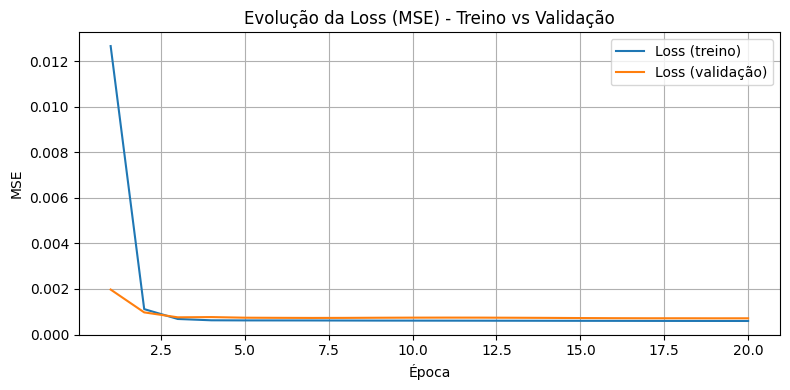

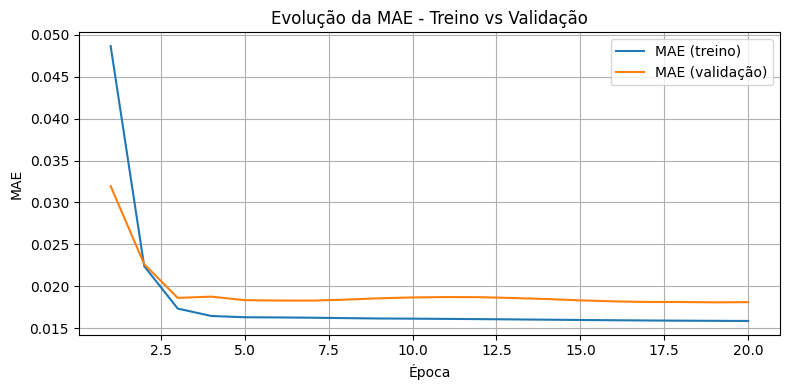

In [ ]:
# Extrair valores de history_lstm
history = history_lstm

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

# Gráfico de 'loss' (MSE)
plt.figure(figsize=(8, 4))

plt.plot(epochs, loss, label='Loss (treino)')
plt.plot(epochs, val_loss, label='Loss (validação)')

plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Evolução da Loss (MSE) - Treino vs Validação')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Gráfico MAE
plt.figure(figsize=(8, 4))

plt.plot(epochs, mae, label='MAE (treino)')
plt.plot(epochs, val_mae, label='MAE (validação)')

plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('Evolução da MAE - Treino vs Validação')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Como é possível ver, o primeiro modelo (principal) aprende muito rápido nas primeiras épocas. Tanto a loss (MSE) quanto a MAE caem de forma acentuada logo nas duas ou três primeiras iterações, o que indica que a rede consegue capturar rapidamente a estrutura básica da série temporal de temperatura. Depois desse início, as curvas se aproximam de um patamar quase estável, variando pouco ao longo das épocas seguintes.

Outro ponto importante é que as curvas de treino e validação ficam bem próximas entre si, sem uma abertura grande entre elas. Isso sugere que o modelo não está “decorando” apenas o conjunto de treino, mas generalizando de forma razoável para os dados de validação. Esse comportamento é compatível com os números obtidos na avaliação: um MAE normalizado de aproximadamente 0,016 e um MAE em unidades reais de cerca de 0,14 °C. Em outras palavras, o erro médio da previsão do modelo no conjunto de teste é de apenas alguns décimos de grau, o que é bastante pequeno para esse tipo de tarefa de previsão de temperatura de curto prazo, e um ótimo resultado.

## Avaliação no conjunto de teste

In [ ]:
# Avaliação no conjunto de teste
test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test, y_test)

print("LSTM - Test MAE:", test_mae_lstm)

# Convertendo o erro de volta para °C
mae_lstm_celsius = test_mae_lstm * train_std

print("LSTM - Test MAE (°C):", mae_lstm_celsius)

y_pred_test_norm = model_lstm.predict(X_test)


# Função para desnormalizar
def denormalize(data_norm, mean, std):
    return data_norm * std + mean

# Retirar a normalização
y_pred_test = denormalize(y_pred_test_norm.flatten(), train_mean, train_std)
y_true_test = denormalize(y_test, train_mean, train_std)

655/655 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.2004e-04 - mae: 0.0171
LSTM - Test MAE: 0.016320759430527687
LSTM - Test MAE (°C): 0.1377583842222485
655/655 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Plotando alguns gráficos comparativos

In [ ]:
def plot_window(X, y, model, mean, std, dataset_name="Treino", max_plots=3):

    windows_size = X.shape[1]
    num_examples = min(max_plots, X.shape[0])

    # Índices do eixo x
    input_index = np.arange(windows_size)
    label_index = windows_size # ponto futuro

    plt.figure(figsize=(15,2 * num_examples))

    for n in range(num_examples):
        x_window = X[n]
        y_true = y[n]

        y_pred = model.predict(X[n:n+1], verbose=0)[0,0]

        # desnormalizar
        x_window_denorm = denormalize(x_window, mean, std)
        y_pred_denorm = denormalize(y_pred, mean, std)
        y_true_denorm = denormalize(y_true, mean, std)

        # eixo x do ponto futuro
        future_x = np.array([label_index])

        plt.subplot(num_examples, 1, n+1)

        # série histórica (linha + pontos)
        plt.plot(input_index, x_window_denorm, marker='.', label='Histórico')

        # ponto verdadeiro (label)
        plt.scatter(future_x, [y_true_denorm],
                    edgecolors='k', label='Verdadeiro (label)', s=64)

        # previsão
        plt.scatter(future_x, [y_pred_denorm],
                    marker='X', edgecolors='k', label='Previsão', s=64)

        if n == 0:
            plt.title(f"{dataset_name} – exemplos de janelas")
            plt.legend()

        plt.ylabel("Temp (°C)")
        plt.xlabel("Passos de tempo (relativos)")
        plt.grid(True)

    plt.tight_layout()
    plt.show()



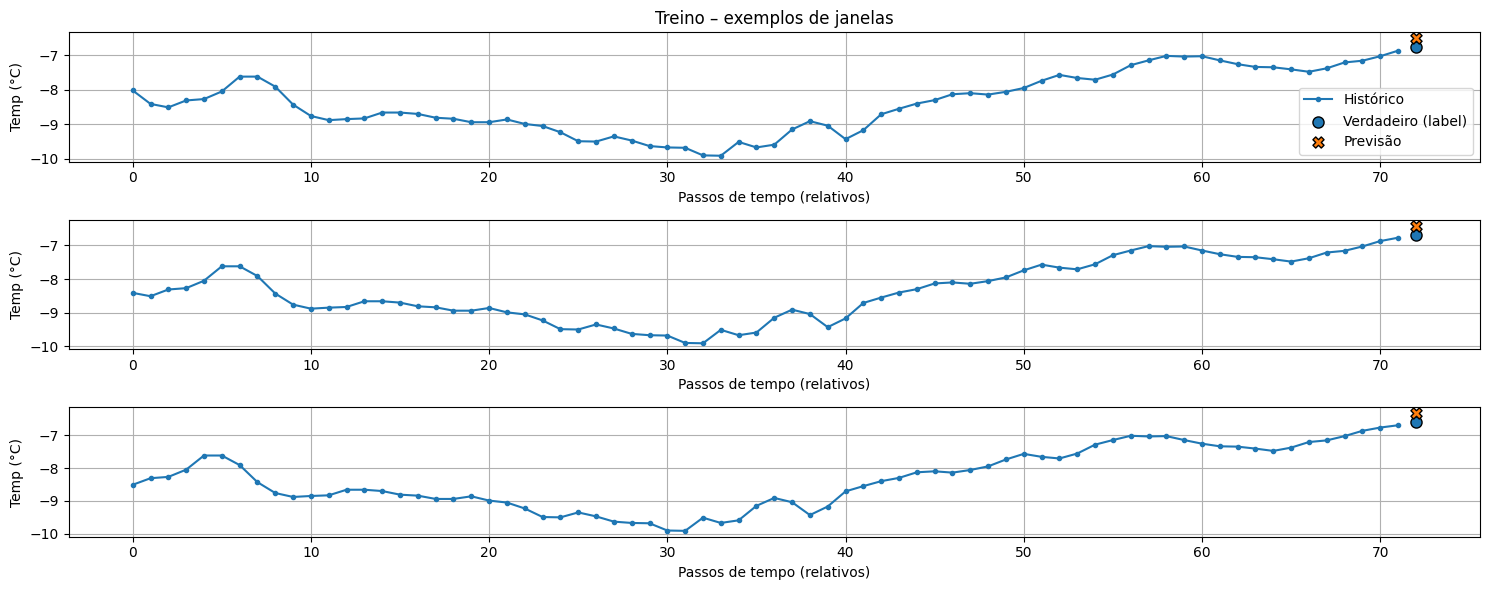

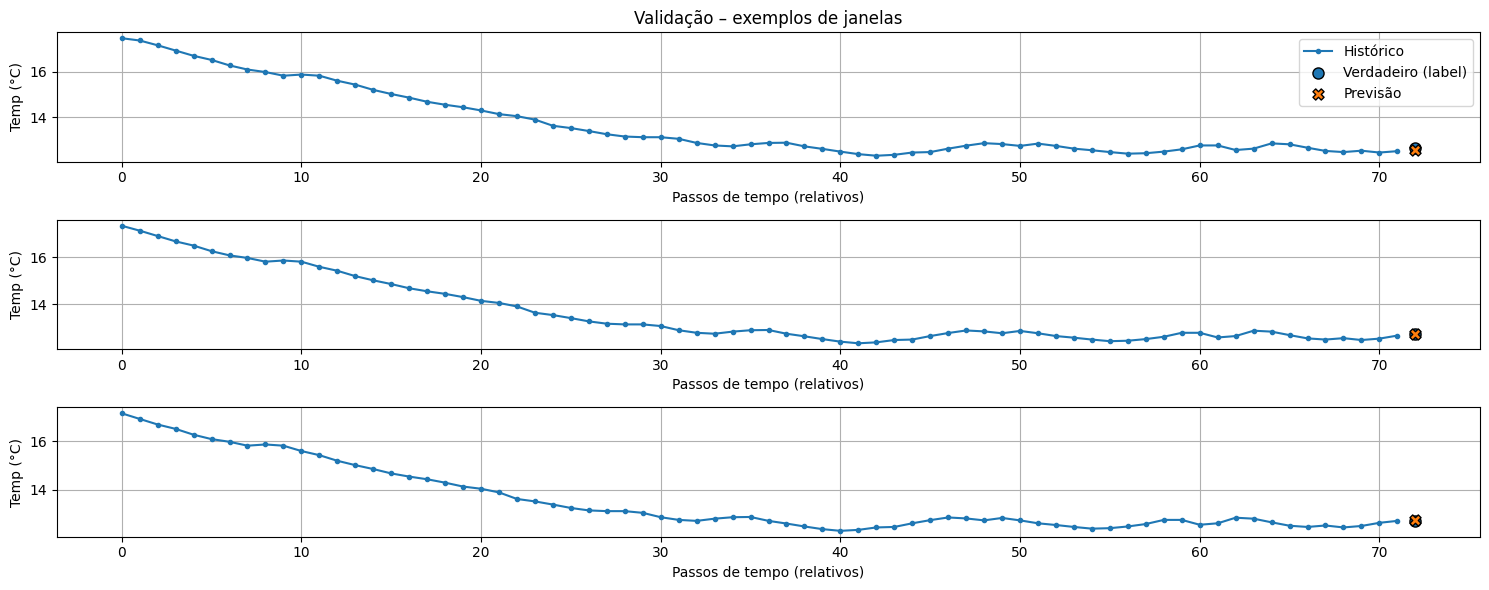

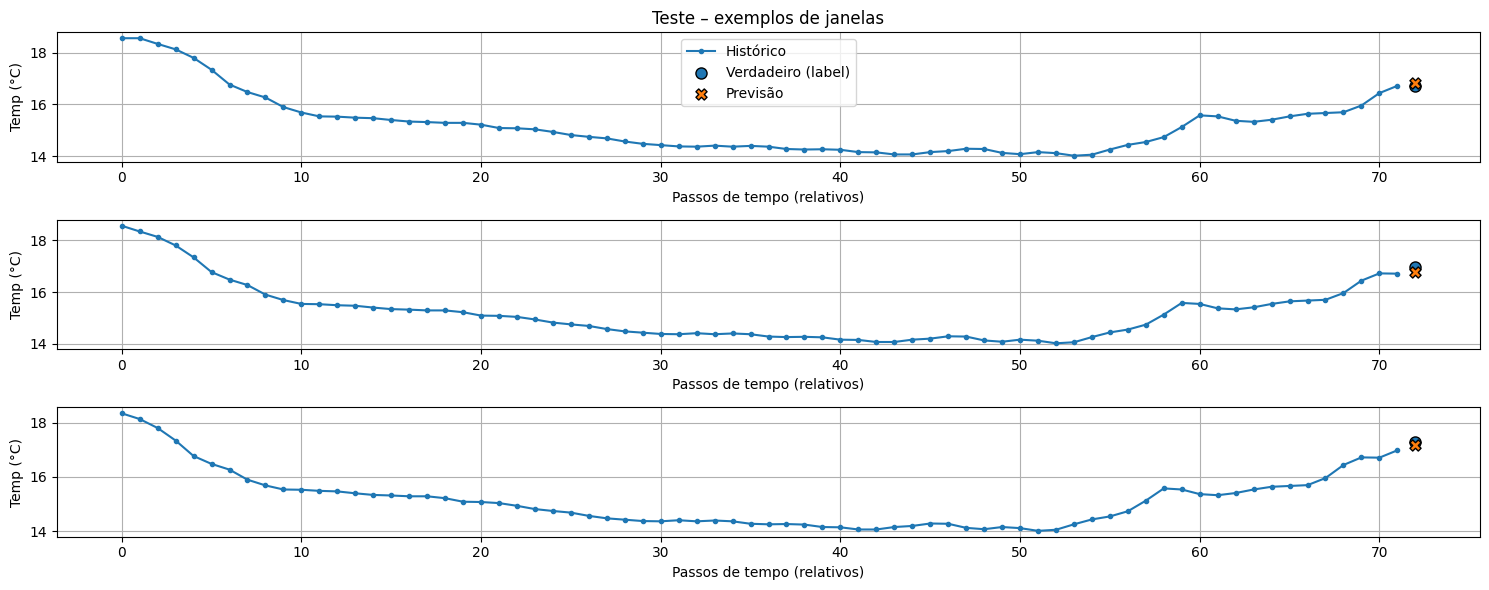

In [ ]:
# Treino
plot_window(X_train, y_train, model_lstm, train_mean, train_std, dataset_name="Treino", max_plots=3)

# Validação
plot_window(X_valid, y_valid, model_lstm, train_mean, train_std, dataset_name="Validação", max_plots=3)

# Teste
plot_window(X_test, y_test, model_lstm, train_mean, train_std, dataset_name="Teste", max_plots=3)

Note que as previsões estão razoavelmente bem "cravadas" em relação a seus valores reais (com poucas discrepâncias), indicando que o modelo aprendeu bem o padrão da série e consegue fazer previsões seguras, com baixa margem de erro.

## Plotando alguns resultados do conjunto de Teste

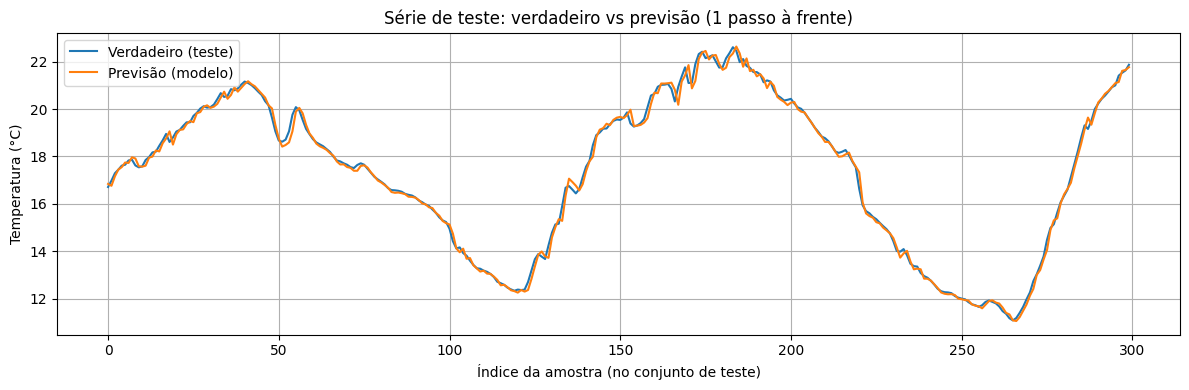

In [ ]:
def plot_test_series_vs_predictions(X_test, y_test, model, mean, std, num_points=300):
    # limitar quantidade de amostras para o gráfico
    num_points = min(num_points, X_test.shape[0])

    # previsões normalizadas
    y_pred_norm = model.predict(X_test[:num_points], verbose=0).flatten()

    # desnormalizar
    y_true = denormalize(y_test[:num_points], mean, std)
    y_pred = denormalize(y_pred_norm, mean, std)

    plt.figure(figsize=(12, 4))
    plt.plot(y_true, label="Verdadeiro (teste)")
    plt.plot(y_pred, label="Previsão (modelo)")
    plt.xlabel("Índice da amostra (no conjunto de teste)")
    plt.ylabel("Temperatura (°C)")
    plt.title("Série de teste: verdadeiro vs previsão (1 passo à frente)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_test_series_vs_predictions(X_test, y_test, model_lstm, train_mean, train_std, num_points=300)

Como se verifica, a previsão ficou bastante bem ajustada aos valores reais da série, demonstrando a eficácia da RNN LSTM e dos parâmetros escolhidos para ela. Aplicado ao conjunto de teste, o modelo soube inferir muito bem a temperatura ao longo de todo o conjunto, aproximando-se muito bem do valor verdadeiro, o que demonstra uma excelente adequação do modelo, bom ajuste de parâmetros e um previsor razoavelmente preciso.

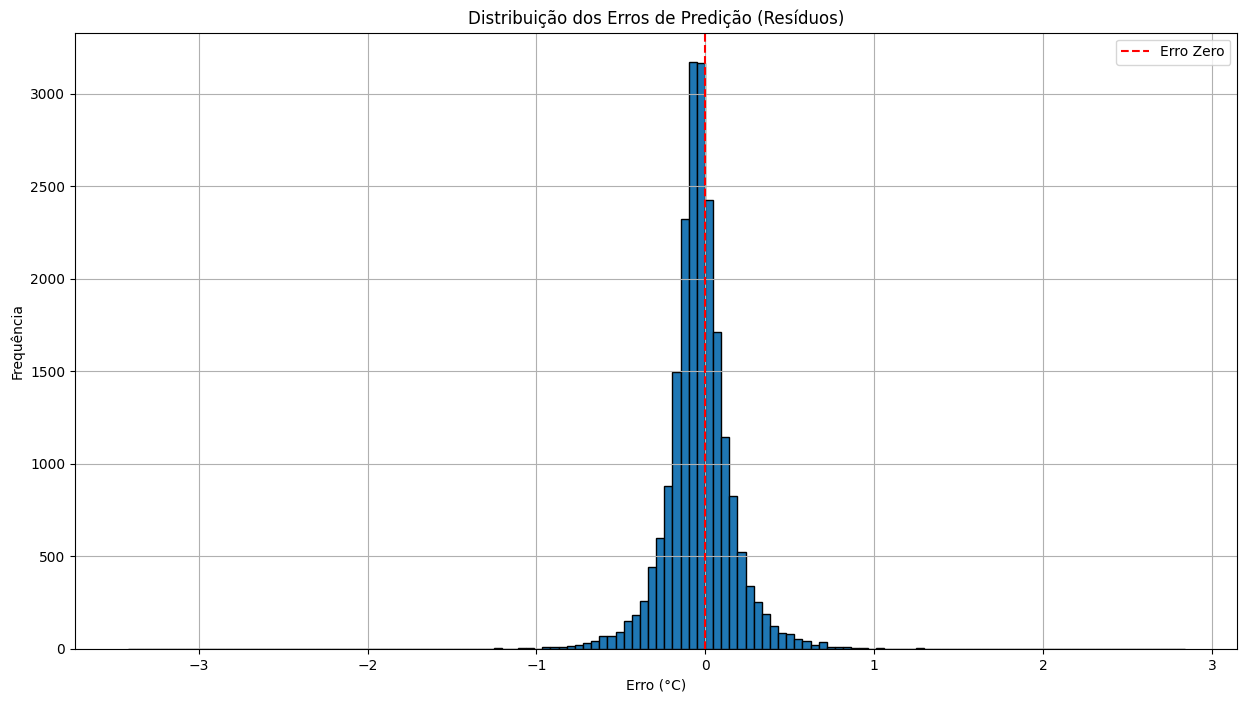

In [ ]:
# Calcular os erros (resíduos)
erros = y_true_test - y_pred_test

plt.figure(figsize=(15, 8))
plt.hist(erros, bins=130, edgecolor='k')
plt.title('Distribuição dos Erros de Predição (Resíduos)')
plt.xlabel('Erro (°C)')
plt.ylabel('Frequência')
plt.axvline(x=0, color='red', linestyle='--', label='Erro Zero')
plt.legend()
plt.grid(True)
plt.show()

A rede estima muito bem os valores, com erros próximos de zero (as estimativas para mais ou menos são pequenas), mas ele levemente subestima as previsões (gráfico pouco deslocado à esquerda).

# **ITEM 5** - Varie os parâmetros da rede e verifique o impacto no erro de predição da temperatura (base de teste). Considere:
- Número de unidades de memória da **LSTM** ou da **GRU**
- Inserir camadas de **Dropout**
- Técnicas de otimização
- Função de perda
- etc.

MODELO 2:
* WINDOWS SIZE: 72
* LSTM(48)
* Lost function: MSE
* Otimizador: AdamW
* Dense(1)
* Sem Dropout
* batch_size = 64
* epochs = 20
* s/ Early Stopping

In [ ]:
from tensorflow.keras import layers, optimizers

# MODELO 2:
# ===== WINDOWS SIZE: 72
# ===== LSTM(16)              32 -> 16
# ===== Lost function: MSE
# ===== Otimizador: AdamW     Adam -> AdamW
# ===== Dense(1)
# ===== Sem Dropout
# ===== batch_size = 64
# ===== epochs = 20
# ===== sem Early Stopping

model_lstm_2 = tf.keras.Sequential([
    layers.Input(shape=(WINDOWS_SIZE, 1)),
    layers.LSTM(16),
    layers.Dense(1)
])

optimizer_2 = optimizers.AdamW(learning_rate=1e-3)

model_lstm_2.compile(
    optimizer=optimizer_2,
    loss='mse',
    metrics=['mae']
)

history_lstm_2 = model_lstm_2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    shuffle=False,
    verbose=1
)

Epoch 1/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 0.0714 - mae: 0.1038 - val_loss: 0.0020 - val_mae: 0.0312
Epoch 2/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.0017 - mae: 0.0262 - val_loss: 9.2762e-04 - val_mae: 0.0212
Epoch 3/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 8.4373e-04 - mae: 0.0190 - val_loss: 7.4756e-04 - val_mae: 0.0186
Epoch 4/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.9628e-04 - mae: 0.0173 - val_loss: 7.4871e-04 - val_mae: 0.0188
Epoch 5/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.6706e-04 - mae: 0.0168 - val_loss: 7.2779e-04 - val_mae: 0.0184
Epoch 6/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.3793e-04 - mae: 0.0164 - val_loss: 7.1346e-04 - val_mae: 0.0181
Epoch 7/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.2509e-04 - mae: 0.0161 - val_loss: 7.1083e-04 - val_mae: 0.0180
Epoch 8/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 6.1877e-04 - mae: 0.0160 - val_loss: 7.0979e-0

MODELO 3:
* WINDOWS SIZE: 72
* LSTM(48)              
* Lost function: MSE
* Otimizador:         
* Dense(1)
* Com 1 Dropout       
* epochs = 20         
* c/ Early Stopping    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# MODELO 3:
# ===== WINDOWS SIZE: 72
# ===== LSTM(16)              32 -> 16
# ===== Lost function: MSE
# ===== Otimizador:           Adam -> AdamW
# ===== Dense(1)
# ===== Com 1 Dropout         0 -> 1
# ===== batch_size = 64
# ===== epochs = 20
# ===== c/ Early Stopping     com Early Stopping

model_lstm_3 = tf.keras.Sequential([
    layers.Input(shape=(WINDOWS_SIZE, 1)),
    layers.LSTM(16),
    layers.Dropout(0.2),   # dropout simples (20%)
    layers.Dense(1)
])

optimizer_3 = optimizers.AdamW(learning_rate=1e-3)

model_lstm_3.compile(
    optimizer=optimizer_3,
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_lstm_3 = model_lstm_3.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    shuffle=False,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - loss: 0.0995 - mae: 0.1642 - val_loss: 0.0025 - val_mae: 0.0341
Epoch 2/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0209 - mae: 0.0959 - val_loss: 0.0016 - val_mae: 0.0302
Epoch 3/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0189 - mae: 0.0923 - val_loss: 0.0016 - val_mae: 0.0303
Epoch 4/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0188 - mae: 0.0919 - val_loss: 0.0012 - val_mae: 0.0262
Epoch 5/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0188 - mae: 0.0916 - val_loss: 9.2724e-04 - val_mae: 0.0224
Epoch 6/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0186 - mae: 0.0910 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 7/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0188 - mae: 0.0912 - val_loss: 0.0012 - val_mae: 0.0263
Epoch 8/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0184 - mae: 0.0906 - val_loss: 0.0011 - val_mae: 0.0251
Epoch 9/20
5256/5256 ━━━━━━━

In [ ]:
# Salvando os pesos e históricos de treino dos modelos 2 e 3

# Salvando os pesos da rede, como um checkpoint
checkpoint2 = os.path.join(BASE_DIR, 'checkpoint_modelo2.weights.h5')
model_lstm_2.save_weights(checkpoint2)

# Salvando o histórico de treinamento
np.save("history_lstm_2_loss.npy",      history_lstm.history['loss'])
np.save("history_lstm_2_val_loss.npy",  history_lstm.history['val_loss'])
np.save("history_lstm_2_mae.npy",       history_lstm.history['mae'])
np.save("history_lstm_2_val_mae.npy",   history_lstm.history['val_mae'])

# Salvando os pesos da rede, como um checkpoint
checkpoint3 = os.path.join(BASE_DIR, 'checkpoint_modelo3.weights.h5')
model_lstm_3.save_weights(checkpoint2)

# Salvando o histórico de treinamento
np.save("history_lstm_3_loss.npy",      history_lstm.history['loss'])
np.save("history_lstm_3_val_loss.npy",  history_lstm.history['val_loss'])
np.save("history_lstm_3_mae.npy",       history_lstm.history['mae'])
np.save("history_lstm_3_val_mae.npy",   history_lstm.history['val_mae'])

In [ ]:
# Recarregando os modelos 2 e 3

#model_lstm_2 = tf.keras.Sequential([
#    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
#    tf.keras.layers.LSTM(32),
#    tf.keras.layers.Dense(1)
#])

# Compilar o modelo: inserir o código próprio do modelo 2

# Carregar os pesos salvos
#model_lstm_2.load_weights(checkpoint2)
#print("Pesos carregados no modelo `model_lstm_2`.")

# Carregar histórico de treinamento
#loss2     = np.load("history_lstm_2_loss.npy")
#val_loss2 = np.load("history_lstm_2_val_loss.npy")
#mae2      = np.load("history_lstm_2_mae.npy")
#val_mae2  = np.load("history_lstm_2_val_mae.npy")

#epochs = range(1, len(los2) + 1)

# Recarregando o modelo 3

#model_lstm_3 = tf.keras.Sequential([
#    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
#    tf.keras.layers.LSTM(32),
#    tf.keras.layers.Dense(1)
#])

# Compilar o modelo: inserir o código próprio do modelo 3


# Carregar os pesos salvos
#model_lstm_3.load_weights(checkpoint)
#print("Pesos carregados no modelo `model_lstm_reloaded`.")

# Carregar histórico de treinamento
#loss3     = np.load("history_lstm_3_loss.npy")
#val_loss3 = np.load("history_lstm_val_3_loss.npy")
#mae3      = np.load("history_lstm_3_mae.npy")
#val_mae3  = np.load("history_lstm_3_val_mae.npy")

#epochs = range(1, len(loss3) + 1)

## Comparando a evolução do treinamento

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history_base, history_new,
                               label_base="Modelo 1",
                               label_new="Modelo 2"):
    """
    history_base: history do Modelo 1
    history_new:  history do modelo a comparar (2 ou 3)
    """
    # --- Loss (MSE) ---
    loss_base = history_base.history['loss']
    val_loss_base = history_base.history['val_loss']
    loss_new = history_new.history['loss']
    val_loss_new = history_new.history['val_loss']

    epochs_base = range(1, len(loss_base) + 1)
    epochs_new  = range(1, len(loss_new)  + 1)

    plt.figure(figsize=(5, 4))

    # Modelo Base em verde/vermelho
    plt.plot(epochs_base, loss_base, color='green', label=f'Loss treino ({label_base})')
    plt.plot(epochs_base, val_loss_base, color='red', label=f'Loss val ({label_base})')

    # Modelo Novo, cores padrão
    plt.plot(epochs_new, loss_new, linestyle='--', label=f'Loss treino ({label_new})')
    plt.plot(epochs_new, val_loss_new, linestyle='--', label=f'Loss val ({label_new})')

    plt.xlabel('Época')
    plt.ylabel('MSE')
    plt.title('Evolução da Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- MAE ---
    mae_base = history_base.history['mae']
    val_mae_base = history_base.history['val_mae']
    mae_new = history_new.history['mae']
    val_mae_new = history_new.history['val_mae']

    plt.figure(figsize=(5, 4))

    plt.plot(epochs_base, mae_base, color='green', label=f'MAE treino ({label_base})')
    plt.plot(epochs_base, val_mae_base, color='red', label=f'MAE val ({label_base})')

    plt.plot(epochs_new, mae_new, linestyle='--', label=f'MAE treino ({label_new})')
    plt.plot(epochs_new, val_mae_new, linestyle='--', label=f'MAE val ({label_new})')

    plt.xlabel('Época')
    plt.ylabel('MAE (normalizado)')
    plt.title('Evolução da MAE')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


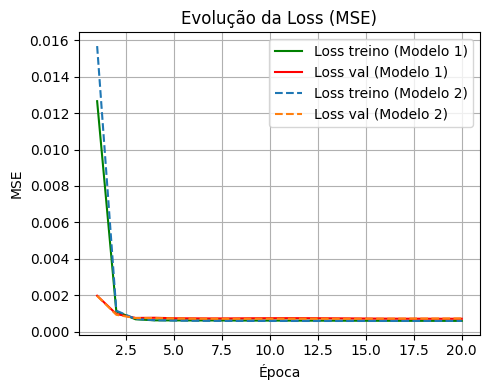

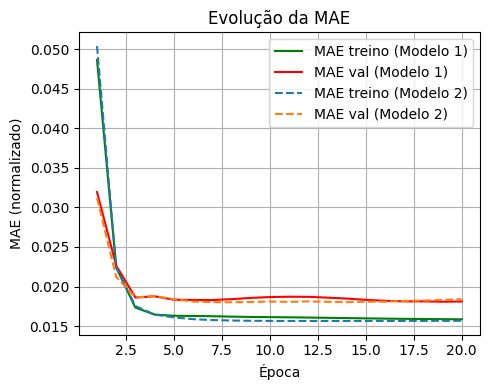

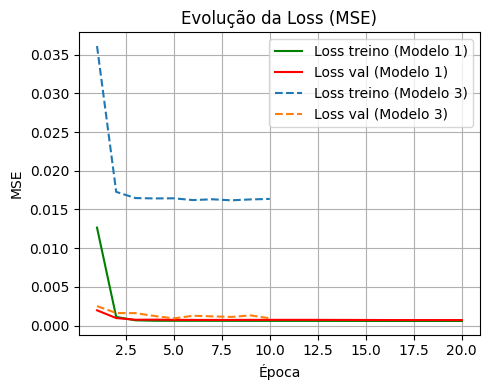

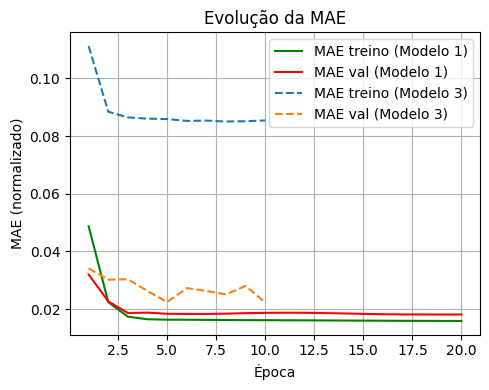

In [ ]:
# Comparar Modelo 2 com Modelo 1
plot_history(history_lstm, history_lstm_2, label_base="Modelo 1", label_new="Modelo 2")

# Comparar Modelo 3 com Modelo 1
plot_history(history_lstm, history_lstm_3, label_base="Modelo 1", label_new="Modelo 3")

A comparação entre o Modelo 1 e o Modelo 2 mostra que a troca do otimizador Adam para AdamW praticamente não alterou o comportamento do treinamento. As curvas de loss e MAE dos dois modelos são quase sobrepostas, tanto em treino quanto em validação, e os valores de teste confirmam isso: o Modelo 1 obteve MAE ≈ 0,0163 (≈ 0,1378 °C) e o Modelo 2 ficou em MAE ≈ 0,0165 (≈ 0,1396 °C). Em termos práticos, essa diferença é desprezível, sugerindo que, para esse problema específico, o Adam já era suficiente e o AdamW não trouxe ganho relevante.

Quando, porém, verifica-se o Modelo 3, a situação é diferente, pois a inclusão de dropout e o uso de Early Stopping fizeram as curvas de loss e MAE se estabilizarem em patamares mais altos, indicando um ajuste pior aos dados. Isso aparece claramente nos resultados de teste: o MAE sobe para cerca de 0,0221 na escala normalizada, o que corresponde a aproximadamente 0,1863 °C. Ou seja, o Modelo 3 erra, em média, bem mais do que os dois primeiros.

Em resumo, a variação dos parâmetros mostrou que o modelo mais simples (Modelo 1), sem dropout e com otimizador Adam, já era suficiente para capturar bem a dinâmica da série de temperatura. As tentativas de aumentar a complexidade do treinamento com AdamW, dropout e Early Stopping não trouxeram melhorias e, no caso do Modelo 3, até prejudicaram a qualidade da previsão.

Não obstante, com relação ao número de unidades de memória, a comparação entre os modelos 1 e 2 mostra que seria possível reduzir o custo computacional sem perder muito em precisão, já que ambos obtiveram resultados semelhantes.

In [ ]:
import numpy as np

def evaluate_model(model, X_test, y_test, train_mean, train_std,
                           label="Modelo"):
    # evaluate retorna [loss, mae] nas escalas normalizadas
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    mae_celsius = test_mae * train_std

    print(f"{label} - Test MSE: {test_loss:.4f}")
    print(f"{label} - Test MAE (normalizado): {test_mae:.4f}")
    print(f"{label} - Test MAE (°C): {mae_celsius:.4f}")

    # previsões normalizadas
    y_pred_norm = model.predict(X_test, verbose=0).flatten()

    # desnormalizar (°C)
    y_pred = y_pred_norm * train_std + train_mean
    y_true = y_test * train_std + train_mean

    return y_true, y_pred, mae_celsius


In [ ]:
# Modelo 1
y_true_test_1, y_pred_test_1, mae_1_c = evaluate_model(model_lstm,
                                                       X_test, y_test,
                                                       train_mean, train_std,
                                                       label="Modelo 1"
)

# Modelo 2
y_true_test_2, y_pred_test_2, mae_2_c = evaluate_model(model_lstm_2,
                                                       X_test, y_test,
                                                       train_mean, train_std,
                                                       label="Modelo 2"
)

# Modelo 3
y_true_test_3, y_pred_test_3, mae_3_c = evaluate_model(model_lstm_3,
                                                       X_test, y_test,
                                                       train_mean, train_std,
                                                       label="Modelo 3"
)

Modelo 1 - Test MSE: 0.0006
Modelo 1 - Test MAE (normalizado): 0.0163
Modelo 1 - Test MAE (°C): 0.1378
Modelo 2 - Test MSE: 0.0006
Modelo 2 - Test MAE (normalizado): 0.0165
Modelo 2 - Test MAE (°C): 0.1396
Modelo 3 - Test MSE: 0.0008
Modelo 3 - Test MAE (normalizado): 0.0221
Modelo 3 - Test MAE (°C): 0.1863


## Comparando a previsão no conjunto de testes

In [ ]:
def plot_test_series_vs_predictions_compare(y_true, y_pred_base, y_pred_new,
                                            label_new="Modelo 2",
                                            num_points=300
):
    # garantir que não passa do tamanho do vetor
    num_points = min(num_points, len(y_true))

    plt.figure(figsize=(12, 4))

    # Verdadeiro em preto
    plt.plot(y_true[:num_points], color='black', label="Verdadeiro (teste)")

    # Modelo 1 em verde
    plt.plot(y_pred_base[:num_points], color='green', alpha=0.8, label="Previsão (Modelo 1)")

    # Modelo novo (2 ou 3) cor padrão
    plt.plot(y_pred_new[:num_points], alpha=0.8, label=f"Previsão ({label_new})")

    plt.xlabel("Índice da amostra (no conjunto de teste)")
    plt.ylabel("Temperatura (°C)")
    plt.title("Série de teste: Verdadeiro vs Modelos")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

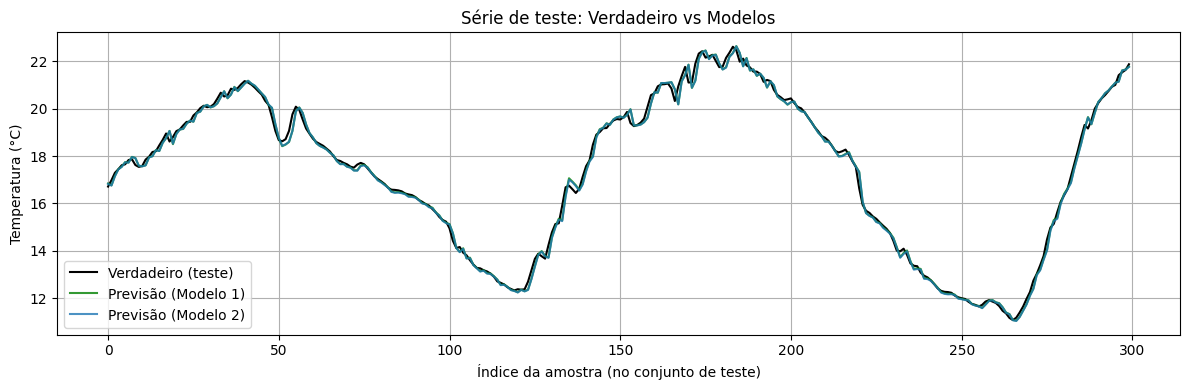

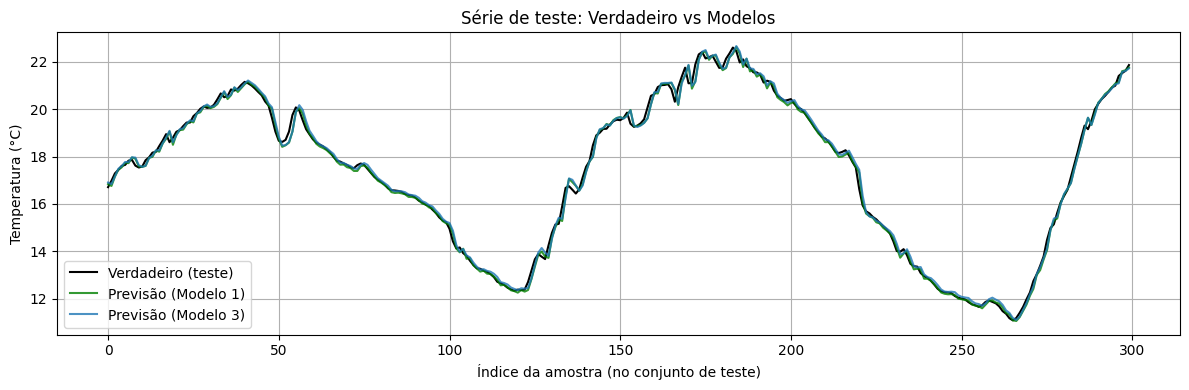

In [ ]:
# Modelo 2 vs Modelo 1
plot_test_series_vs_predictions_compare(
    y_true_test_1, y_pred_test_1, y_pred_test_2,
    label_new="Modelo 2",
    num_points=300
)

# Modelo 3 vs Modelo 1
plot_test_series_vs_predictions_compare(
    y_true_test_1, y_pred_test_1, y_pred_test_3,
    label_new="Modelo 3",
    num_points=300
)

Observando as séries no conjunto de teste, percebe-se que todos os modelos acompanham muito bem o comportamento real da temperatura. As curvas previstas praticamente "imitam" a curva verdadeira, reproduzindo tanto a tendência geral quanto os picos e vales ao longo do tempo. Isso vale principalmente para o Modelo 1, que quase se confunde com a série real em boa parte do trecho mostrado, o que está de acordo com o MAE bem baixo obtido nos testes.

Quando comparamos os modelos entre si, o Modelo 2 aparece visualmente quase idêntico ao Modelo 1, reforçando a ideia de que a troca de otimizador e a redução de unidades de 32 para 16 não trouxeram diferença prática. Já o Modelo 3 também segue o formato da série verdadeira, mas em alguns trechos é possível notar pequenos desvios um pouco maiores, compatíveis com o aumento do erro médio observado nas métricas numéricas. Ainda assim, de maneira geral, todos os modelos conseguem produzir previsões bastante fiéis à série de temperatura real no horizonte de curto prazo considerado.

A diferença vista entre os modelos 2 e 3 aparece mais sensivelmente nas métricas do que “a olho nu”. O Modelo 3, de fato, é pior que os Modelos 1 e 2, mas essa piora é relativamente sutil quando projetada na escala do gráfico e em uma janela com mais de 300 pontos. O que ocorre é que o Modelo 3 comete pequenos desvios com mais frequência (refletidos no MAE maior), mas esses desvios são tão pequenos em comparação com a variação total da temperatura que as curvas continuam muito próximas visualmente.

## Conferindo os histogramas de erros

In [ ]:
def plot_error_histogram(y_true, y_pred, titulo="Modelo"):
    erros = y_true - y_pred

    plt.figure(figsize=(15, 8))
    plt.hist(erros, bins=130, edgecolor='k')
    plt.title(f'Distribuição dos Erros de Predição (Resíduos) - {titulo}')
    plt.xlabel('Erro (°C)')
    plt.ylabel('Frequência')
    plt.axvline(x=0, color='red', linestyle='--', label='Erro Zero')
    plt.legend()
    plt.grid(True)
    plt.show()

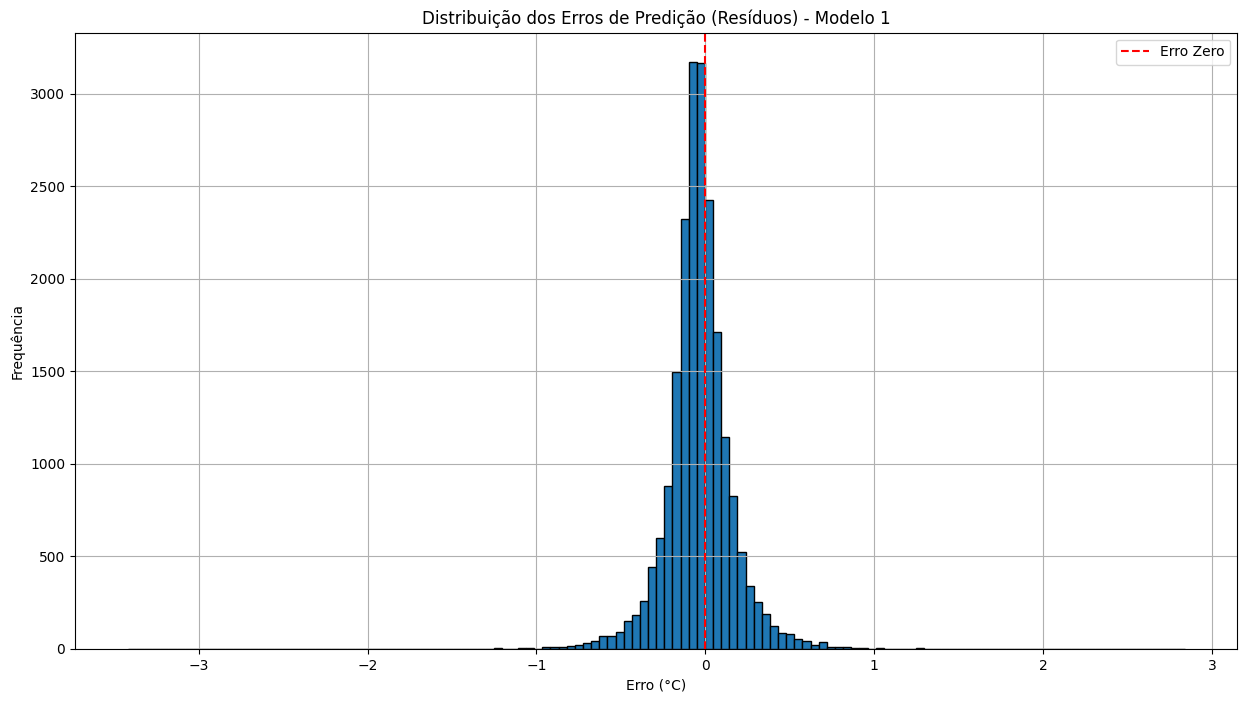

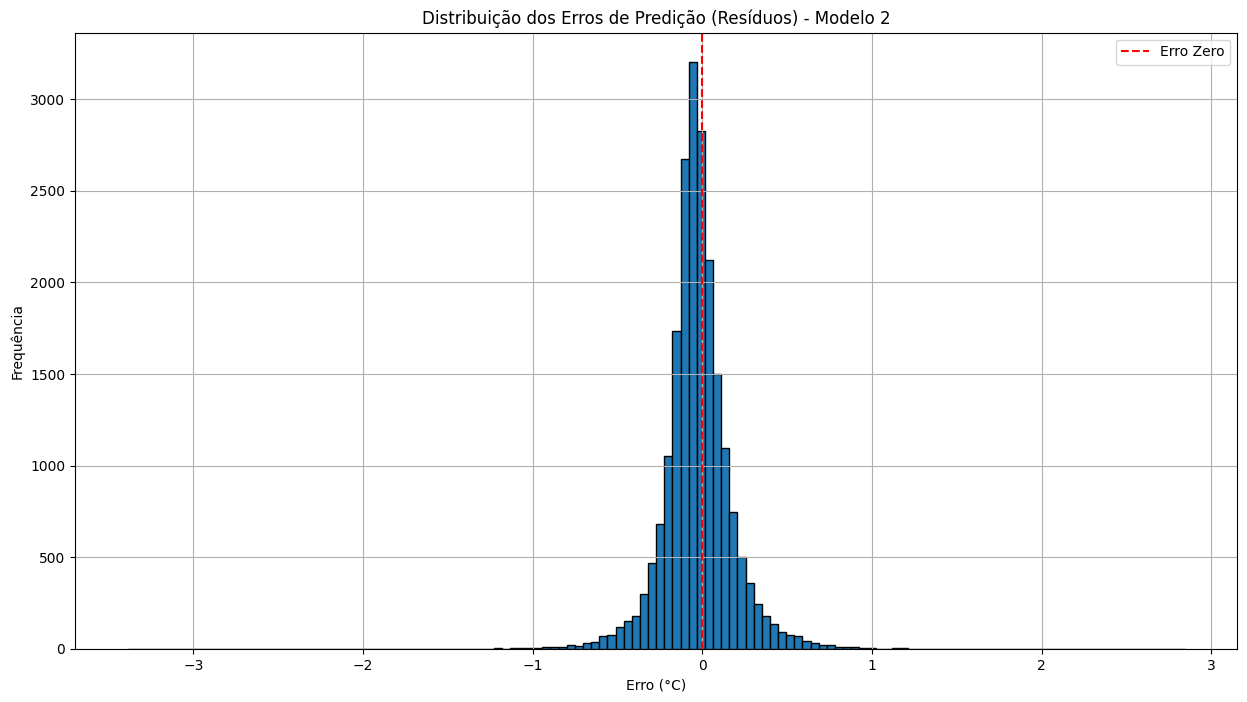

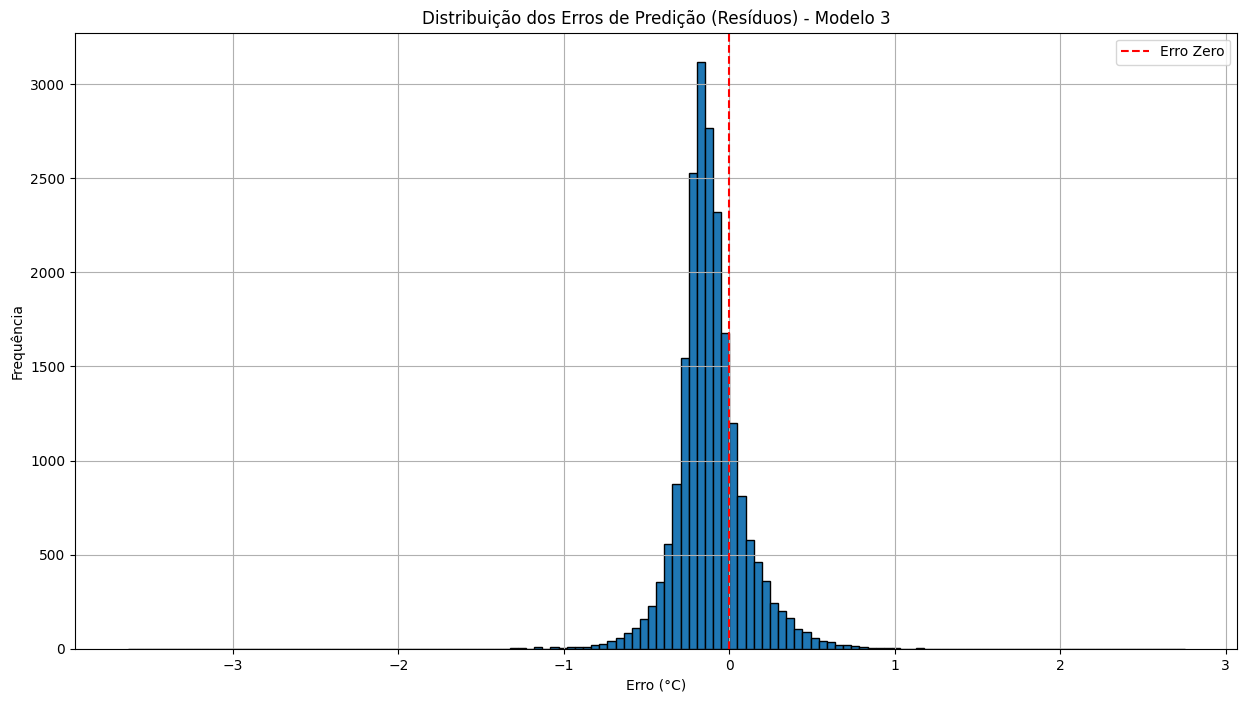

In [ ]:
plot_error_histogram(y_true_test_1, y_pred_test_1, titulo="Modelo 1")
plot_error_histogram(y_true_test_2, y_pred_test_2, titulo="Modelo 2")
plot_error_histogram(y_true_test_3, y_pred_test_3, titulo="Modelo 3")

Com relação aos erros cometidos, percebe-se uma tendência cada vez maior em "subestimar" as previsões, tanto no modelo 2 quanto no modelo 3, o que se reflete no leve deslocamento do gráfico para a esquerda.

# **ITEM 6** - Altere o janelamento (valor de `k`) de amostras passadas usadas para a predição. O que acontece com a precisão na base de teste?


In [ ]:
NEW_WINDOWS_SIZE = 36
# Amostras de 10min -> 6 por hora -> 6h de histórico
# Criando novos conjuntos para não alterar desnecessariamente os antigos

X_train_new, y_train_new = make_windows(train_norm, NEW_WINDOWS_SIZE)
X_valid_new, y_valid_new = make_windows(valid_norm, NEW_WINDOWS_SIZE)
X_test_new, y_test_new   = make_windows(test_norm,  NEW_WINDOWS_SIZE)

## Treinando o novo modelo com a janela atualizada

In [ ]:
# MODELO NOVO:
# ===== NEW WINDOWS SIZE: Agora 36
# ===== LSTM(32)
# ===== Lost function: MSE
# ===== Dense(1)
# ===== Sem Dropout
# ===== batch_size = 64
# ===== epochs = 20

model_lstm_newWS = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(NEW_WINDOWS_SIZE, 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

model_lstm_newWS.compile(optimizer='adam',
                   loss='mse',
                   metrics=['mae']
)

history_lstm_newWS = model_lstm_newWS.fit(X_train_new, y_train_new,
                                          validation_data = (X_valid_new, y_valid_new),
                                          epochs=20,
                                          verbose=1,
                                          batch_size = 64,
                                          shuffle=False
)

Epoch 1/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0419 - mae: 0.0912 - val_loss: 0.0020 - val_mae: 0.0317
Epoch 2/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.0017 - mae: 0.0271 - val_loss: 7.6897e-04 - val_mae: 0.0187
Epoch 3/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 7.6280e-04 - mae: 0.0184 - val_loss: 7.7286e-04 - val_mae: 0.0191
Epoch 4/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 6.6068e-04 - mae: 0.0170 - val_loss: 7.7467e-04 - val_mae: 0.0191
Epoch 5/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 6.5628e-04 - mae: 0.0168 - val_loss: 7.3415e-04 - val_mae: 0.0182
Epoch 6/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 6.2979e-04 - mae: 0.0164 - val_loss: 6.9518e-04 - val_mae: 0.0174
Epoch 7/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 6.1912e-04 - mae: 0.0162 - val_loss: 6.8210e-04 - val_mae: 0.0172
Epoch 8/20
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 6.1669e-04 - mae: 0.0161 - val_loss: 6.8089e-0

## Gráficos comparativos

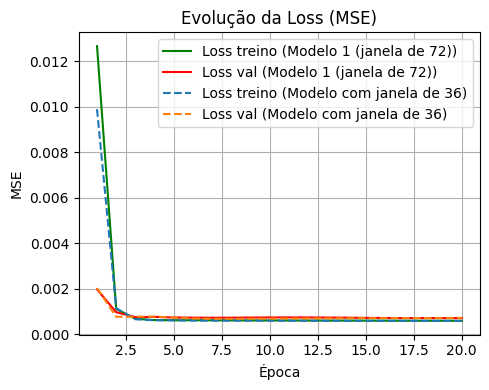

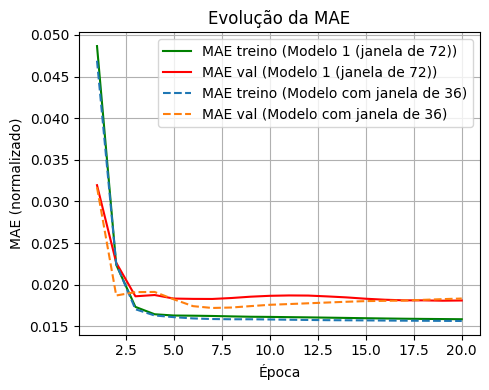

Modelo com janela de 36 - Test MSE: 0.0006
Modelo com janela de 36 - Test MAE (normalizado): 0.0166
Modelo com janela de 36 - Test MAE (°C): 0.1397


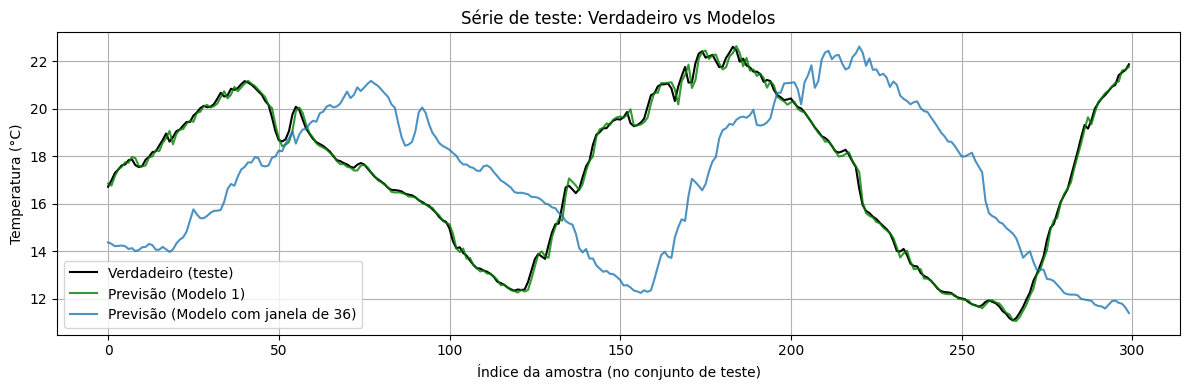

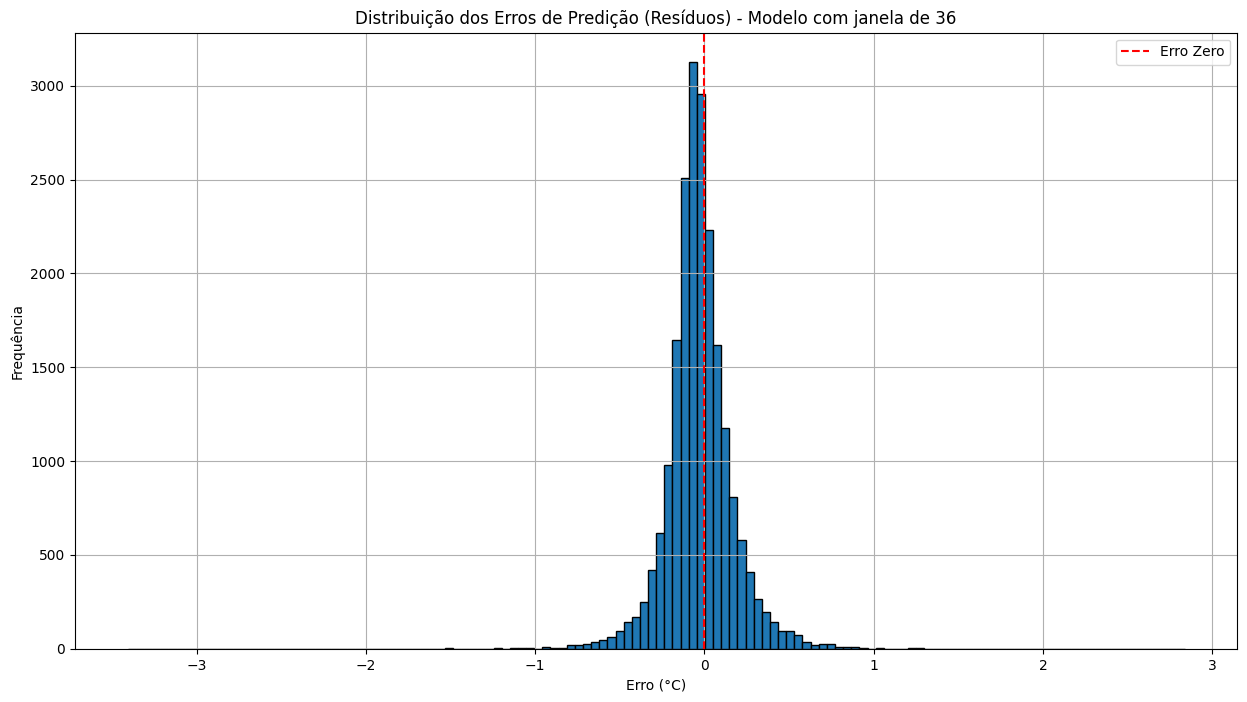

In [ ]:
# Comparar Modelo de janela 36 com Modelo 1 (janela 72)
plot_history(history_lstm, history_lstm_newWS, label_base="Modelo 1 (janela de 72)", label_new="Modelo com janela de 36")

# Modelo njanela 36
y_true_test_newWS, y_pred_test_newWS, mae_newWS = evaluate_model(model_lstm_newWS,
                                                       X_test_new, y_test_new,
                                                       train_mean, train_std,
                                                       label="Modelo com janela de 36"
)

# Modelo 1 (janela de 72) vs Modelo com janela de 36
plot_test_series_vs_predictions_compare(y_true_test_1, y_pred_test_1, y_pred_test_newWS,
                                        label_new="Modelo com janela de 36",
                                        num_points=300
)

plot_error_histogram(y_true_test_newWS, y_pred_test_newWS, titulo="Modelo com janela de 36")

Ao reduzir o tamanho da janela de 72 para 36 amostras, as curvas de loss e MAE de treino/validação praticamente não mudaram. Nos gráficos de evolução, o modelo com janela menor converge rápido e atinge valores médios de erro muito parecidos com o Modelo 1. Isso indica que, olhando só para as métricas globais, os dois modelos conseguem “acertar” razoavelmente a próxima amostra de temperatura: o MAE de teste continua em torno de 0,14 °C, o que é um erro baixo em termos absolutos.

Quando analisamos a série completa no conjunto de teste, porém, fica claro que o histórico menor prejudica a qualidade da previsão e, portanto, sua precisão cai. A curva do modelo com janela de 36 perde o alinhamento com a série verdadeira em vários trechos, não acompanhando bem os ciclos diários e os picos mais longos, enquanto o modelo com janela de 72 segue idêntico à curva real. Em outras palavras, com apenas 36 passos de histórico a rede tem menos informação sobre a tendência de médio prazo da temperatura e passa a depender demais do comportamento mais local, o que leva a previsões visualmente piores, mesmo que o erro médio ponto a ponto ainda pareça baixo nas métricas numéricas.

# **ITEM 7** - Considere somente os dados de **2015 em diante** no treinamento. Como o tamanho da base afeta a predição? Com base nos resultados, como você interpreta a relação do passado histórico com a predição do valor atual da temperatura?

                     temperatura_C
Date Time                         
2015-01-01 00:00:00           2.06
2015-01-01 00:10:00           2.15
2015-01-01 00:20:00           2.10
2015-01-01 00:30:00           2.08
2015-01-01 00:40:00           2.07
2015-01-01 00:50:00           2.22
2015-01-01 01:00:00           2.22
2015-01-01 01:10:00           2.15
2015-01-01 01:20:00           2.22
2015-01-01 01:30:00           2.17
2015-01-01 01:40:00           2.15
2015-01-01 01:50:00           2.13
2015-01-01 02:00:00           2.04
2015-01-01 02:10:00           1.96
2015-01-01 02:20:00           1.88
2015-01-01 02:30:00           1.89
2015-01-01 02:40:00           2.03
2015-01-01 02:50:00           1.95
2015-01-01 03:00:00           1.79
2015-01-01 03:10:00           1.79


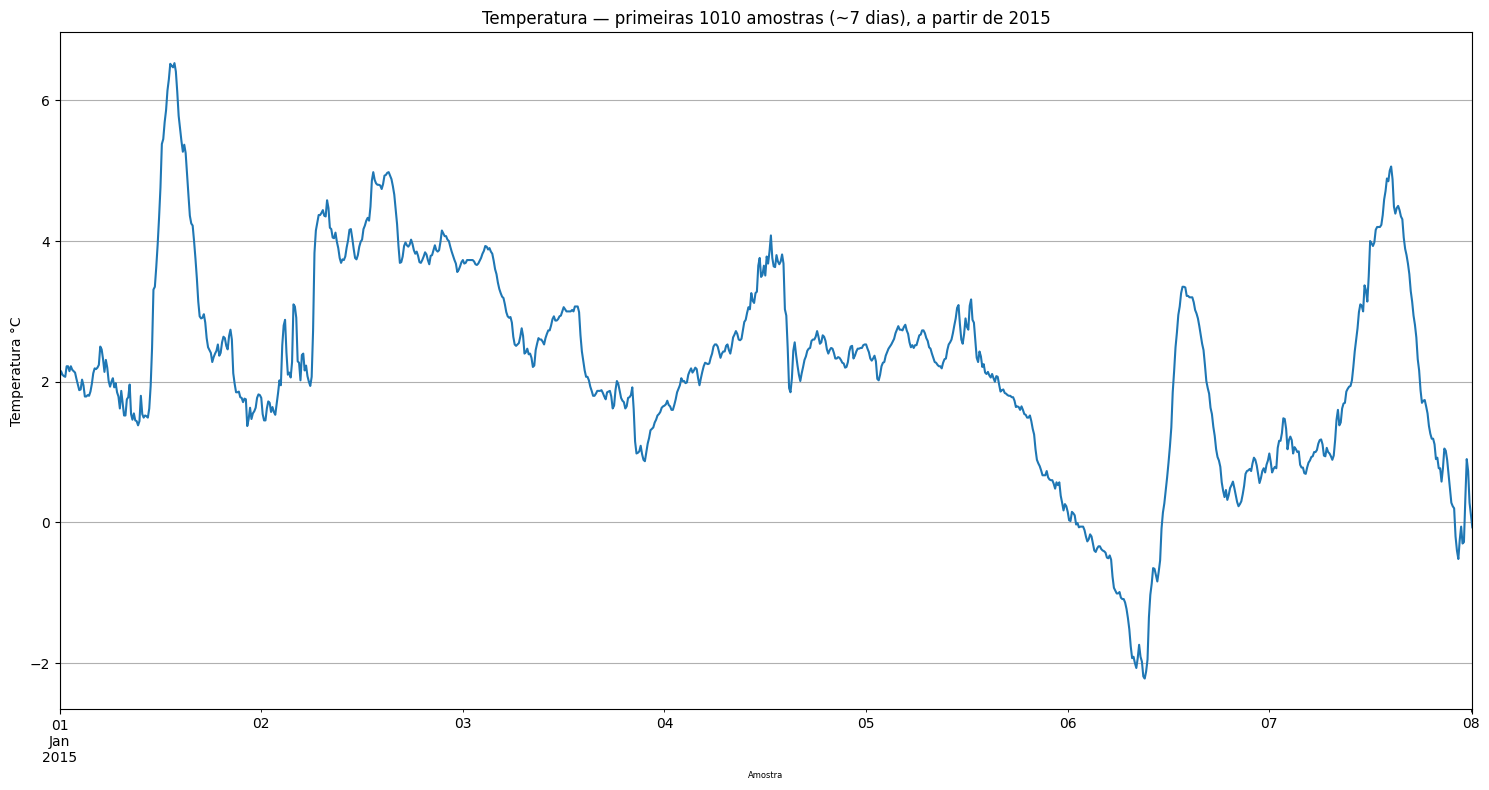

Arquivo gerado:  /content/drive/MyDrive/ITA - Pessoal/8º Semestre/ET-287/Projetos/Projeto 5/temperatura2015.csv


In [ ]:
# Seleciona as amostras a partir de 2015
df_2015 = df_temp["2015-01-01 00:00:00":]

print(df_2015.head(20))

# Salvando o novo arquivo
temp2015_csv = os.path.join(BASE_DIR, 'temperatura2015.csv')
df_2015.to_csv(temp2015_csv, index=True)

# Rápida visualização de um período aproximado de 7 dias
plt.figure(figsize=(15,8))

# Como há 6 registros por hora, 6*24*7 = 1008
subset2015 = df_2015.iloc[:1010]
subset2015.plot(legend=False, ax=plt.gca())

plt.title("Temperatura — primeiras 1010 amostras (~7 dias), a partir de 2015")
plt.xlabel("Amostra", fontsize=6)
plt.ylabel("Temperatura °C")
plt.tight_layout()
plt.grid()
plt.show()

print("Arquivo gerado: ", temp2015_csv)

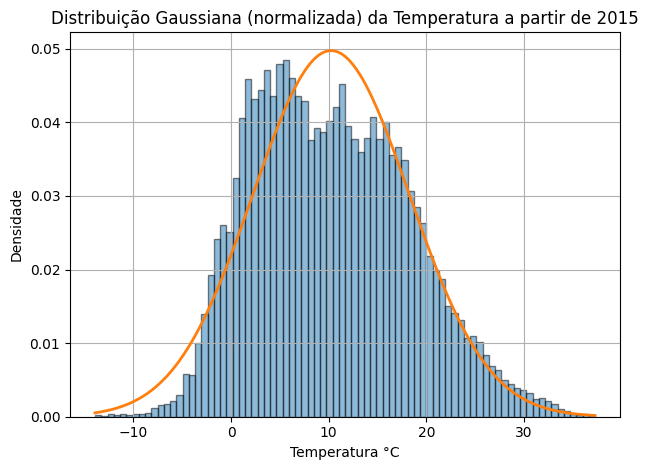

Nova média (μ): 10.251 °C | Novo esvio padrão (σ): 8.018 °C


In [ ]:
# Distribuição Gaussiana da temperatura de todas as amostras de 2015 em diante
mu2015 = df_2015["temperatura_C"].mean()
sigma2015 = df_2015["temperatura_C"].std(ddof=1)

# plotando a distribuição
plt.figure()
counts2015, bins2015, patches2015 = plt.hist(df_2015, bins = 80, density=True, alpha=0.5, edgecolor='black')

xs2015 = np.linspace(bins2015.min(), bins2015.max(), 500)
pdf2015 = (1/(sigma2015 * sqrt(2 * pi))) * np.exp(-0.5 * ((xs2015 - mu2015)/sigma2015)**2)
plt.plot(xs2015, pdf2015, linewidth=2)

plt.title("Distribuição Gaussiana (normalizada) da Temperatura a partir de 2015")
plt.xlabel("Temperatura °C")
plt.ylabel("Densidade")
plt.tight_layout()
plt.grid()
plt.show()

print(f"Nova média (μ): {mu2015:.3f} °C | Novo esvio padrão (σ): {sigma2015:.3f} °C")

In [ ]:
# Verificando a quantidade de amostras
n2015 = len(df_2015["temperatura_C"])

n_train2015 = int(n2015 * 0.80)
n_val2015 = int( n2015 * 0.15)
n_test2015 = n2015 - n_train2015 - n_val2015

print(f" Amostras de TREINO: {n_train2015} amostras")
print(f" Amostras de VALIDAÇÃO: {n_val2015} amostras")
print(f" Amostras de TESTE: {n_test2015} amostras")
print("===========================================")
print(f"Total de amostras: {n_train2015 + n_val2015 + n_test2015}")
print(f"Total de amostras no dataset: {n2015}")

 Amostras de TREINO: 83856 amostras
 Amostras de VALIDAÇÃO: 15723 amostras
 Amostras de TESTE: 5241 amostras
Total de amostras: 104820
Total de amostras no dataset: 104820


In [ ]:
# Dividindo mantendo a ordem temporal
train2015 = df_2015["temperatura_C"].iloc[:n_train2015]                             # de 0 até 80%
valid2015 = df_2015["temperatura_C"].iloc[n_train2015:n_train2015 + n_val2015]      # 80% até 95%
test2015 = df_2015["temperatura_C"].iloc[n_train2015 + n_val2015:]                  # o restante (≈5%)

# Conferindo o tamanho dos intervalos e datas
print("Treino 2015: ", train2015.shape, "de", train2015.index.min(), "a", train2015.index.max(), " - Valores dos extremos:", train2015[train2015.index.min()], "e", train2015[train2015.index.max()])
print("Validação 2015: ", valid2015.shape, "de", valid2015.index.min(), "a", valid2015.index.max(), " - Valores dos extremos:", valid2015[valid2015.index.min()], "e", valid2015[valid2015.index.max()])
print("Teste 2015: ", test2015.shape, "de", test2015.index.min(), "a", test2015.index.max(), " - Valores dos extremos:", test2015[test2015.index.min()], "e", test2015[test2015.index.max()])

Treino 2015:  (83856,) de 2015-01-01 00:00:00 a 2016-08-05 07:50:00  - Valores dos extremos: 2.06 e 15.41
Validação 2015:  (15723,) de 2016-08-05 08:00:00 a 2016-11-25 14:30:00  - Valores dos extremos: 15.54 e 4.73
Teste 2015:  (5241,) de 2016-11-25 14:40:00 a 2017-01-01 00:00:00  - Valores dos extremos: 4.91 e -4.82


In [ ]:
# Normalizando os dados
train2015_mean = train2015.mean()
train2015_std = train2015.std()
print(f"Média: {train2015_mean:.3f} °C | Desvio padrão: {train2015_std:.3f} °C")

# Serie normalizada
train2015_norm = (train2015 - train2015_mean)/train2015_std
valid2015_norm = (valid2015 - train2015_mean)/train2015_std
test2015_norm = (test2015 - train2015_mean)/train2015_std

Média: 10.329 °C | Desvio padrão: 7.954 °C


In [ ]:
# Série para manipular 2015
series2015 = df_2015["temperatura_C"].astype(float)  # numericamente igual à junção de train, valid e test

# Manter WINDOWS_SIZW = 72 para comparação
X_train2015, y_train2015 = make_windows(train2015_norm, WINDOWS_SIZE)
X_valid2015, y_valid2015 = make_windows(valid2015_norm, WINDOWS_SIZE)
X_test2015, y_test2015   = make_windows(test2015_norm,  WINDOWS_SIZE)


## Criar e treinar a nova rede com dados de 2015 em diante

In [ ]:
model_lstm2015 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

model_lstm2015.compile(optimizer='adam',
                   loss='mse',
                   metrics=['mae']
)

history_lstm2015 = model_lstm2015.fit(X_train2015, y_train2015,
                              validation_data = (X_valid2015, y_valid2015),
                              epochs=20,
                              verbose=1,
                              batch_size = 64,
                              shuffle=False
)

Epoch 1/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0538 - mae: 0.1310 - val_loss: 0.0036 - val_mae: 0.0462
Epoch 2/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0031 - mae: 0.0379 - val_loss: 0.0026 - val_mae: 0.0394
Epoch 3/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0020 - mae: 0.0305 - val_loss: 0.0027 - val_mae: 0.0430
Epoch 4/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0016 - mae: 0.0276 - val_loss: 0.0024 - val_mae: 0.0406
Epoch 5/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0017 - val_mae: 0.0350
Epoch 6/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 9.2308e-04 - mae: 0.0205 - val_loss: 0.0014 - val_mae: 0.0309
Epoch 7/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 8.0584e-04 - mae: 0.0190 - val_loss: 0.0012 - val_mae: 0.0286
Epoch 8/20
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 7.7170e-04 - mae: 0.0185 - val_loss: 8.9286e-04 - val_mae: 0.0233
Epoch 9/20
1310/1310 ━━━

In [ ]:
# Salvando os pesos da rede, como um checkpoint
checkpoint2015 = os.path.join(BASE_DIR, 'checkpoint_modelo2015.weights.h5')
model_lstm2015.save_weights(checkpoint2015)

# Salvando o histórico de treinamento
np.save("history_lstm2015_loss.npy",      history_lstm2015.history['loss'])
np.save("history_lstm2015_val_loss.npy",  history_lstm2015.history['val_loss'])
np.save("history_lstm2015_mae.npy",       history_lstm2015.history['mae'])
np.save("history_lstm2015_val_mae.npy",   history_lstm2015.history['val_mae'])

In [ ]:
# Recarregando o modelo
#WINDOWS_SIZE = 72  # ajuste se estiver usando outro valor

#model_lstm2015_reloaded = tf.keras.Sequential([
#    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
#    tf.keras.layers.LSTM(32),
#    tf.keras.layers.Dense(1)
#])

# Compilar o modelo de acordo com os dados no código acima

# Carregar os pesos salvos
#model_lstm2015_reloaded.load_weights(checkpoint2015)
#print("Pesos carregados no modelo `model_lstm2015_reloaded`.")

# Carregar histórico de treinamento
#loss2015     = np.load("history_lstm2015_loss.npy")
#val_loss2015 = np.load("history_lstm2015_val_loss.npy")
#mae2015      = np.load("history_lstm2015_mae.npy")
#val_mae2015  = np.load("history_lstm2015_val_mae.npy")

#epochs = range(1, len(loss2015) + 1)

## Avaliação da nova rede treinada com dados de 2015 em diante

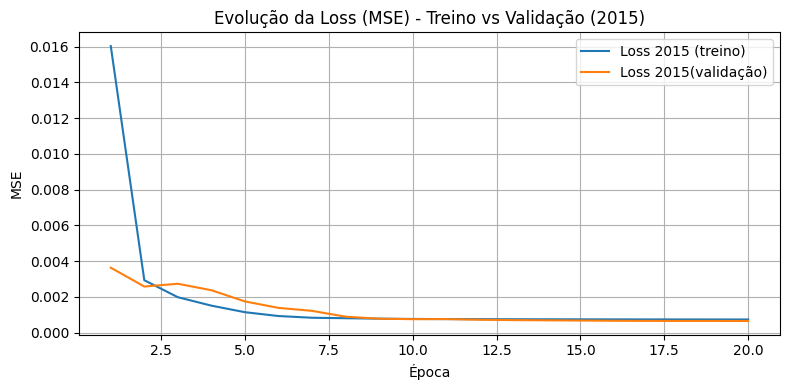

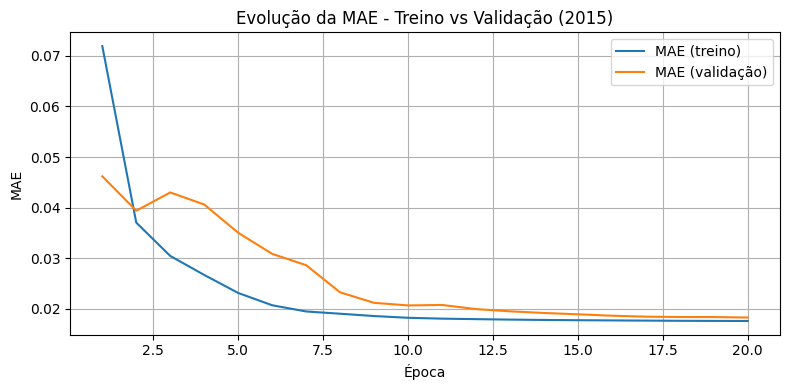

In [ ]:
# Extrair valores de history_lstm2015
history2015 = history_lstm2015

loss2015 = history2015.history['loss']
val_loss2015 = history2015.history['val_loss']
mae2015 = history2015.history['mae']
val_mae2015 = history2015.history['val_mae']

epochs2015 = range(1, len(loss2015) + 1)

# Gráfico de 'loss' (MSE)
plt.figure(figsize=(8, 4))

plt.plot(epochs2015, loss2015, label='Loss 2015 (treino)')
plt.plot(epochs2015, val_loss2015, label='Loss 2015(validação)')

plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Evolução da Loss (MSE) - Treino vs Validação (2015)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Gráfico MAE
plt.figure(figsize=(8, 4))

plt.plot(epochs2015, mae2015, label='MAE (treino)')
plt.plot(epochs2015, val_mae2015, label='MAE (validação)')

plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('Evolução da MAE - Treino vs Validação (2015)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Avaliação no conjunto de teste
test_loss_lstm2015, test_mae_lstm2015 = model_lstm2015.evaluate(X_test2015, y_test2015)

print("LSTM - Test MAE:", test_mae_lstm2015)

# Convertendo o erro de volta para °C
mae_lstm_celsius2015 = test_mae_lstm2015 * train2015_std

print("LSTM - Test MAE (°C):", mae_lstm_celsius2015)

y_pred_test_norm2015 = model_lstm2015.predict(X_test2015)

# Retirar a normalização
y_pred_test2015 = denormalize(y_pred_test_norm2015.flatten(), train2015_mean, train2015_std)
y_true_test2015 = denormalize(y_test2015, train2015_mean, train2015_std)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6178e-04 - mae: 0.0228
LSTM - Test MAE: 0.02152196690440178
LSTM - Test MAE (°C): 0.17117827176070388
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


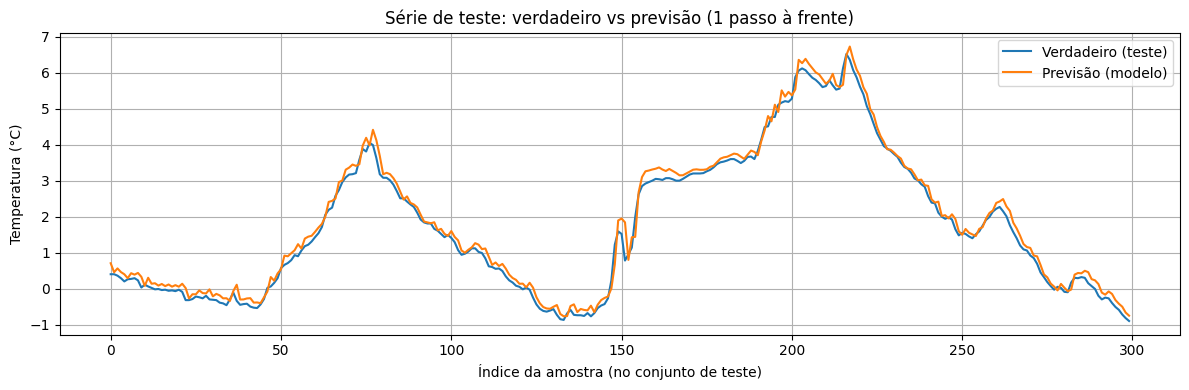

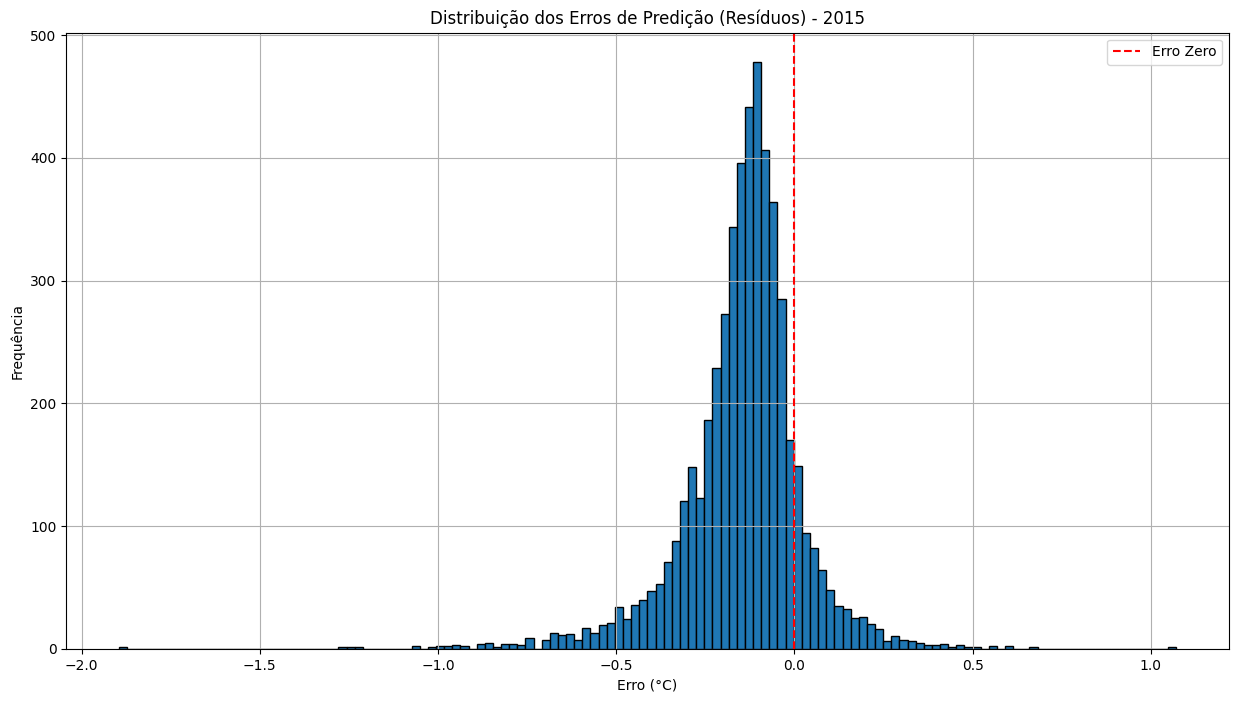

In [ ]:
plot_test_series_vs_predictions(X_test2015, y_test2015, model_lstm2015, train2015_mean, train2015_std, num_points=300)

# Calcular os erros (resíduos)
erros2015 = y_true_test2015 - y_pred_test2015

plt.figure(figsize=(15, 8))
plt.hist(erros2015, bins=130, edgecolor='k')
plt.title('Distribuição dos Erros de Predição (Resíduos) - 2015')
plt.xlabel('Erro (°C)')
plt.ylabel('Frequência')
plt.axvline(x=0, color='red', linestyle='--', label='Erro Zero')
plt.legend()
plt.grid(True)
plt.show()

Quando treinamos o modelo apenas com os dados a partir de 2015, o tamanho da base de treino caiu bastante (de 336.440 para 83.856 amostras). Isso se refletiu diretamente na qualidade da predição, pois o MAE de teste aumentou de cerca de 0,14 °C para aproximadamente 0,17 °C. Em outras palavras, com menos exemplos para aprender, o modelo passou a errar um pouco mais na previsão da temperatura, mesmo mantendo um treinamento estável e sem sinais fortes de overfitting nas curvas de loss e MAE.

Olhando para os gráficos da série de teste, o modelo ainda acompanha bem o formato geral da temperatura, mas fica um pouco menos preciso em alguns picos e vales. O histograma dos resíduos reforça esse fato, já que os erros continuam concentrados perto de zero, mas com uma leve assimetria e dispersão maior, indicando uma maior "subestimação" da previsão, já que o gráfico está mais deslocado à esquerda.

Com base nesses resultados, pode-se dizer que o passado histórico tem um papel importante na predição do valor atual, pois, quanto mais longo e variado é esse histórico, melhor a rede consegue captar os padrões sazonais e de curto prazo da série e, consequentemente, mais precisa tende a ser a previsão. Reduzir o histórico não impede o modelo de performar razoavelmente bem, mas limita sua “memória” sobre o comportamento típico da variável, o que se traduz em um erro médio um pouco maior. Isso, obviamente, pode ser amplificado dependendo do tipo de dado com que se está trabalhando, como ações, volume de chuvas, etc.

# **ITEM 8** - Altere o código para prever a temperatura para um período maior, por exemplo, a próxima **1 hora** (6 saídas — 60 minutos)

In [96]:
# Alterar o janelamento

def make_windows_multistep(series_1d, window_size, horizon=6):

    values = series_1d.to_numpy()
    x = []
    y = []

    # até len(values) - window_size - horizon + 1 para não passar do fim
    for i in range(len(values) - window_size - horizon + 1):
        x.append(values[i : i + window_size])                    # histórico
        y.append(values[i + window_size : i + window_size + horizon])  # 6 futuros

    x = np.array(x)
    y = np.array(y)   # agora y tem shape (n_amostras, horizon)

    # (amostras, timesteps, features=1)
    x = x[..., np.newaxis]
    return x, y


In [98]:
WINDOWS_SIZE = 72
HORIZON = 6  # 6 passos à frente (1 h)

X_train_multi, y_train_multi = make_windows_multistep(train_norm, WINDOWS_SIZE, HORIZON)
X_valid_multi, y_valid_multi = make_windows_multistep(valid_norm,   WINDOWS_SIZE, HORIZON)
X_test_multi,  y_test_multi  = make_windows_multistep(test_norm,  WINDOWS_SIZE, HORIZON)

print(X_train_multi.shape)  # (N_train, 72, 1)
print(y_train_multi.shape)  # (N_train, 6)


(336363, 72, 1)
(336363, 6)


In [99]:
# Criando a rede para prever um período de 1h à frente

model_lstm_multi = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOWS_SIZE, 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(HORIZON)   # agora são 6 saídas
])

model_lstm_multi.compile(
    optimizer='adam',
    loss='mse',      # MSE agora é média dos 6 passos
    metrics=['mae']  # MAE também média nos 6 passos
)

history_multi = model_lstm_multi.fit(
    X_train_multi, y_train_multi,
    validation_data=(X_valid_multi, y_valid_multi),
    epochs=20,
    batch_size=64,
    shuffle=False,
    verbose=1
)

Epoch 1/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 0.1400 - mae: 0.1641 - val_loss: 0.0120 - val_mae: 0.0780
Epoch 2/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0064 - mae: 0.0525 - val_loss: 0.0083 - val_mae: 0.0627
Epoch 3/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0055 - mae: 0.0482 - val_loss: 0.0076 - val_mae: 0.0586
Epoch 4/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0052 - mae: 0.0466 - val_loss: 0.0068 - val_mae: 0.0553
Epoch 5/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0050 - mae: 0.0454 - val_loss: 0.0060 - val_mae: 0.0513
Epoch 6/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0048 - mae: 0.0444 - val_loss: 0.0060 - val_mae: 0.0521
Epoch 7/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0046 - mae: 0.0437 - val_loss: 0.0059 - val_mae: 0.0514
Epoch 8/20
5256/5256 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.0045 - mae: 0.0433 - val_loss: 0.0059 - val_mae: 0.0517
Epoch 9/20
5256/5256 ━━━━━━━━━━━

## Avaliação do novo modelo treinado

In [100]:
test_loss_multi, test_mae_multi = model_lstm_multi.evaluate(X_test_multi, y_test_multi, verbose=0)
mae_celsius_media = test_mae_multi * train_std

print("Test MSE (multi-step):", test_loss_multi)
print("Test MAE (normalizado):", test_mae_multi)
print("Test MAE médio por passo (°C):", mae_celsius_media)

Test MSE (multi-step): 0.004622509703040123
Test MAE (normalizado): 0.0467991828918457
Test MAE médio por passo (°C): 0.3950171464474379


In [101]:
y_pred_test_norm_multi = model_lstm_multi.predict(X_test_multi, verbose=0)

y_pred_test_multi = y_pred_test_norm_multi * train_std + train_mean          # (N_test, 6)
y_true_test_multi = y_test_multi          * train_std + train_mean           # (N_test, 6)

## Visualizando algumas previsões

In [105]:
def plot_multistep_window(X, y, model, mean, std,
                                   dataset_name="Teste",
                                   max_plots=3,
                                   horizon=6):

    window_size = X.shape[1]
    num_examples = min(max_plots, X.shape[0])

    # Faz todas as previsões necessárias de uma vez (para as primeiras janelas)
    y_pred_norm = model.predict(X[:num_examples], verbose=0)   # (num_examples, horizon)

    plt.figure(figsize=(10, 3 * num_examples))

    for n in range(num_examples):
        x_win_norm = X[n].squeeze()
        y_true_norm = y[n]
        y_pred_n_norm = y_pred_norm[n]

        # Desnormalizar
        x_win = x_win_norm * std + mean
        y_true_c = y_true_norm * std + mean
        y_pred_c = y_pred_n_norm * std + mean

        # eixos x
        input_idx = np.arange(window_size)
        future_idx = np.arange(window_size, window_size + horizon)

        plt.subplot(num_examples, 1, n+1)

        # histórico
        plt.plot(input_idx, x_win, marker='.', label='Histórico')

        # futuros verdadeiros
        plt.scatter(future_idx, y_true_c,
                    label='Verdadeiro (label)', edgecolors='k')

        # futuros previstos
        plt.scatter(future_idx, y_pred_c,
                    marker='X', edgecolors='k', label='Previsão')

        if n == 0:
            plt.title(f"{dataset_name} – exemplos de janelas (multi-step)")
            plt.legend()

        plt.ylabel("Temp (°C)")
        plt.xlabel("Passos de tempo (relativos)")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

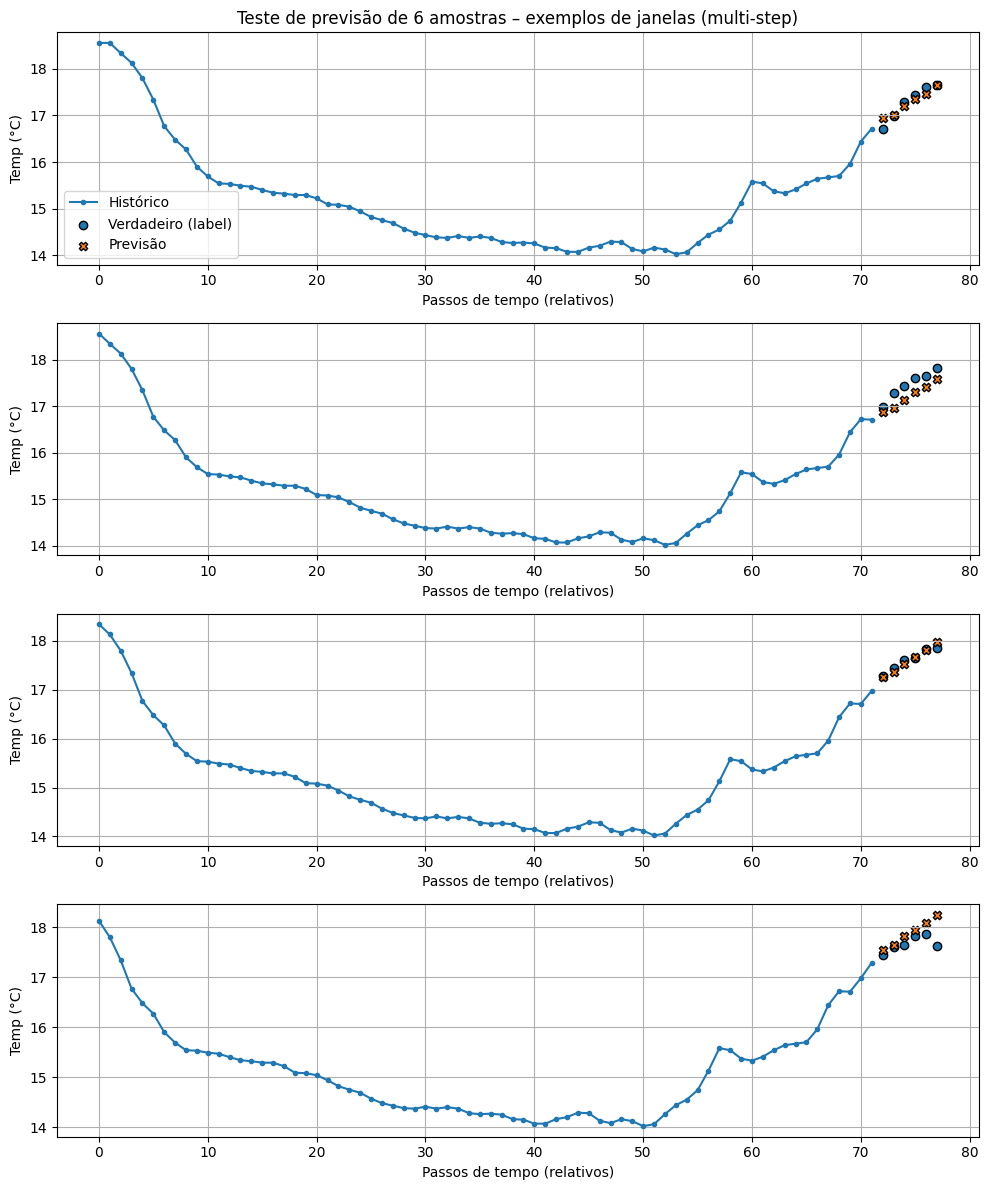

In [106]:
plot_multistep_window(
    X_test_multi, y_test_multi, model_lstm_multi,
    train_mean, train_std,
    dataset_name="Teste de previsão de 6 amostras",
    max_plots=4,
    horizon=HORIZON
)

In [107]:
def plot_test_series_vs_predictions_multistep(X_test, y_test, model,
                                             mean, std,
                                             horizon=6,
                                             step=0,
                                             num_points=300):

    # Previsões normalizadas para todo o X_test
    y_pred_norm = model.predict(X_test, verbose=0)   # (N, horizon)

    # Desnormalizar
    y_true_all = y_test * std + mean    # (N, horizon)
    y_pred_all = y_pred_norm * std + mean

    # Selecionar apenas o horizonte desejado
    y_true_h = y_true_all[:, step]
    y_pred_h = y_pred_all[:, step]

    num_points = min(num_points, len(y_true_h))

    plt.figure(figsize=(12, 4))

    plt.plot(y_true_h[:num_points], label="Verdadeiro (teste)")
    plt.plot(y_pred_h[:num_points], label="Previsão (modelo)", alpha=0.8)

    plt.xlabel("Índice da amostra (no conjunto de teste)")
    plt.ylabel("Temperatura (°C)")
    plt.title(f"Série de teste: verdadeiro vs previsão (horizonte +{(step+1)*10} min)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ver 10 minutos à frente:

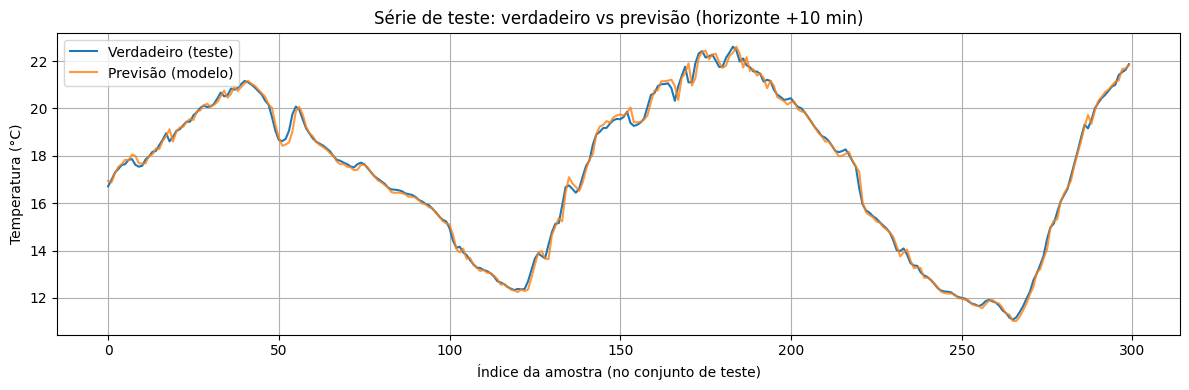

In [109]:
plot_test_series_vs_predictions_multistep(
    X_test_multi, y_test_multi, model_lstm_multi,
    train_mean, train_std,
    horizon=HORIZON,
    step=0,          # 0 → +10 min
    num_points=300
)

## Ver 60 minutos à frente:

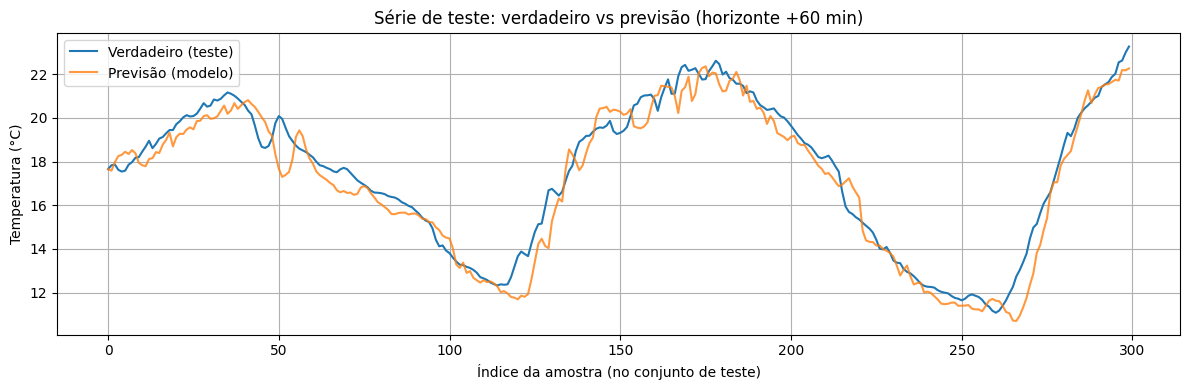

In [112]:
plot_test_series_vs_predictions_multistep(
    X_test_multi, y_test_multi, model_lstm_multi,
    train_mean, train_std,
    horizon=HORIZON,
    step=5,          # 5 -> 6º passo -> +60 min
    num_points=300
)

Ao adaptar o modelo para prever 6 passos à frente (1 hora), os exemplos de janelas mostram que ele consegue prolongar razoavelmente bem a trajetória recente da temperatura. Nos três casos das figuras, o histórico de 72 amostras é seguido por seis pontos verdadeiros e seis previstos: em geral, os marcadores de previsão ficam bem próximos dos valores reais, especialmente nos primeiros passos (+10, +20, +30 minutos). À medida que se vai para o quinto e sexto ponto, a dispersão aumenta um pouco, mas o modelo ainda captura se a tendência é de subida ou de queda, o que é um bom sinal para uma previsão de curto prazo estendida.

Na análise da base de teste completa, a diferença entre horizontes fica mais clara. Para +10 minutos, a curva prevista praticamente se confunde com a série verdadeira, como já acontecia no modelo original de um passo à frente. Já no horizonte de +60 minutos, o modelo ainda acompanha o formato geral dos ciclos diários, mas passa a errar mais em amplitude e no tempo dos picos e vales. Em alguns trechos ele antecipa ou atrasa as viradas, e tende a suavizar um pouco as variações mais bruscas. Isso é esperado, porque prever uma hora à frente é um problema mais difícil, e o modelo precisa “apostar” no que ainda vai acontecer sem ver os próximos dados intermediários. Em resumo, a LSTM adaptada para múltiplas saídas funciona bem para estender a previsão no tempo, mas a confiabilidade diminui conforme o horizonte de previsão aumenta, especialmente no último passo (+60 min).